# IRFs and sensitivity pyirf - Boostrap

**WARNING**

This is still a work-in-progress, it will evolve with the pipeline comparisons and converge with ctaplot+cta-benchmarks.

**IMPORTANT**

Soon this will be supersided by new results using [pyirf](https://github.com/cta-observatory/pyirf) and ctaplot metrics.

**Author(s):**
    
- Dr. Michele Peresano (CEA-Saclay/IRFU/DAp/LEPCHE), 2020
based on previous work by J. Lefacheur.
- Alice Donini (INFN Sezione di Trieste and Universita degli Studi di Udine), 2020
- Gaia Verna (Aix Marseille Univ, CNRS/IN2P3, CPPM, Marseille, France), 2020

based on [pyirf](https://github.com/cta-observatory/pyirf/blob/master/docs/notebooks/) 

**Description:**

This notebook contains DL3 and benchmarks for the _protopipe_ pipeline. 

Note that:
    - a more general set of benchmarks is being defined in cta-benchmarks/ctaplot,
    - follow [this](https://www.overleaf.com/16933164ghbhvjtchknf) document by adding new benchmarks or proposing new ones.

**Requirements:**

To run this notebook you will need a set of DL2 files produced on the grid with protopipe script _make_performance_pyirf_EventDisplay.py_

The MC production to be used and the appropriate set of files to use for this notebook can be found [here](https://forge.in2p3.fr/projects/step-by-step-reference-mars-analysis/wiki#The-MC-sample ).

The data format required to run the notebook is the current one used by _protopipe_ .

**Development and testing:**  

For the moment this notebook is optimized to work only on files produced from LSTCam + NectarCam telescope configurations.  
As with any other part of _protopipe_ and being part of the official repository, this notebook can be further developed by any interested contributor.  
The execution of this notebook is not currently automatic, it must be done locally by the user - preferably _before_ pushing a pull-request.  
**IMPORTANT:** Please, if you wish to contribute to this notebook, before pushing anything to your branch (better even before opening the PR) clear all the output and remove any local directory paths that you used for testing (leave empty strings).

**TODO:**  
* update everything...

## Table of contents

* [Optimized cuts](#Optimized-cuts)
    - [Direction cut](#Direction-cut)
* [Differential sensitivity from cuts optimization](#Differential-sensitivity-from-cuts-optimization)
* [IRFs](#IRFs)
    - [Effective area](#Effective-area)
    - [Point Spread Function](#Point-Spread-Function)
        + [Angular resolution](#Angular-resolution)
    - [Energy dispersion](#Energy-dispersion)
        + [Energy resolution](#Energy-resolution)
    - [Background rate](#Background-rate)

## Imports

In [1]:
import os

import pyirf
import numpy as np
from astropy.io import fits
import uproot4 as uproot
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from matplotlib.ticker import ScalarFormatter

from pyirf.binning import bin_center
from pyirf.utils import cone_solid_angle

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [2]:
Boostrap = np.arange(0,100)

## Input data

In [3]:
protopipe_path = '/ctadata/gaia/PyIRF_data/IRFs_Sensitivity/Protopipe_Pyirf/STD_protopipe_NO/Baseline/New_RF/irf_tail_Time50.00h/'

# Performance calculated with pyirf from ED DL2 files
ED_pyirf_file = 'reference_data/aswg/point-like/LaPalma_20_South_EventDisplay/EventDisplay_pyirf_North_20deg_S_onaxis_50h.fits.gz'

### Load EventDisplay North perf

In [4]:
# Path of EventDisplay IRF data in the user's local setup
# Please, empty the indir_EventDisplay variable before pushing to the repo
indir = "./reference_data/aswg/point-like/LaPalma_20_South_EventDisplay/"
irf_file_event_display = "DESY.d20191030.V2.ID0NIM2LST3MST3SST3SCMST3.prod3b-LaPalma-20degt05b-LL.Nb.3AL4-BN15.180000s.root"

irf_eventdisplay = uproot.open(os.path.join(indir, irf_file_event_display))

### Load Requirements

In [5]:
indir = './reference_data/requirements/'

site = 'North'
obs_time = '50h'

# Full array
infiles = dict(sens=f'/{site}-{obs_time}.dat') # 30 min
requirements = dict()
for key in infiles.keys():
    requirements[key] = Table.read(indir + infiles[key], format='ascii')
requirements['sens'].add_column(Column(data=(10**requirements['sens']['col1']), name='ENERGY'))
requirements['sens'].add_column(Column(data=requirements['sens']['col2'], name='SENSITIVITY'))

## Optimized cuts

### Direction cut

In [6]:
protopipe_file = protopipe_path + 'pyirf_protopipe.fits.gz'

rad_max = QTable.read(protopipe_file, hdu='RAD_MAX')[0]

energy_low = rad_max['ENERG_LO'].to_value(u.TeV)
energy_high = rad_max['ENERG_HI'].to_value(u.TeV)
energy_centers = 0.5 * (rad_max['ENERG_LO'] + rad_max['ENERG_HI']).to_value(u.TeV)
energy_width = 0.5 * (rad_max['ENERG_HI'] - rad_max['ENERG_LO']).to_value(u.TeV)

theta_cut_boostrap = {}
for e in  energy_centers:
    theta_cut_boostrap[e] = []   

In [7]:
for i in Boostrap:
    protopipe_file = protopipe_path + f'pyirf_protopipe_{i}.fits.gz'
    
    # [1:-1] removes under/overflow bins
    rad_max = QTable.read(protopipe_file, hdu='RAD_MAX')[0]

    for n, e in  enumerate(energy_centers):
        theta_cut_boostrap[e].append(rad_max['RAD_MAX'][0][n].value)

Bin center 0.0062946270589708374 TeV


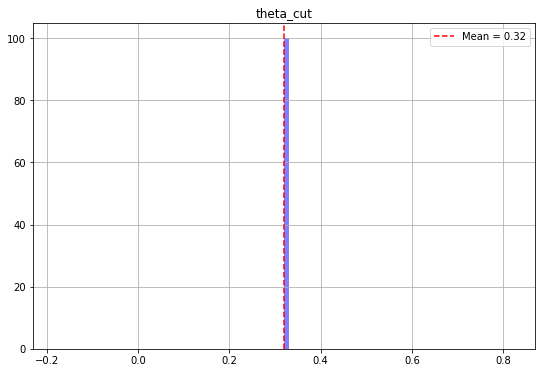

Bin center 0.012885910751752876 TeV


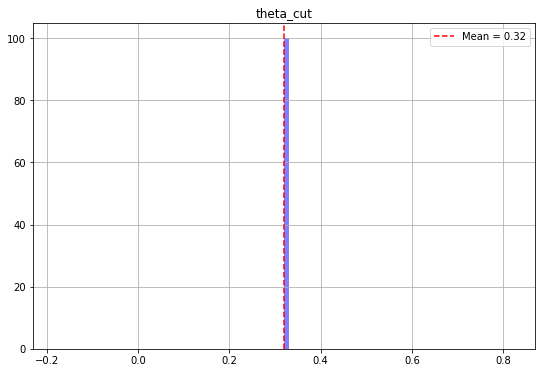

Bin center 0.013493205015796463 TeV


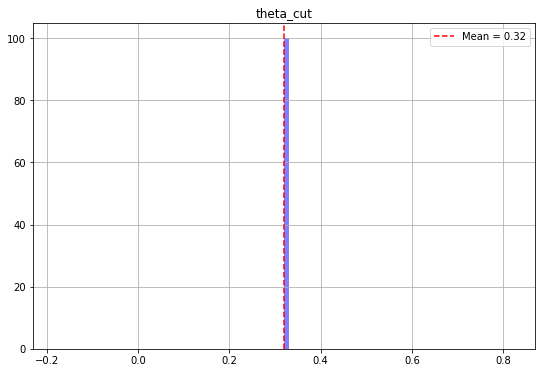

Bin center 0.014129120176744066 TeV


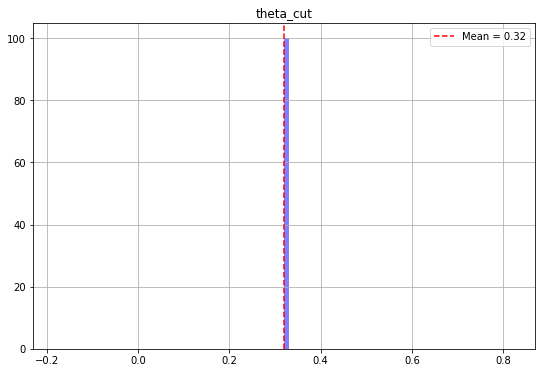

Bin center 0.014795005095910682 TeV


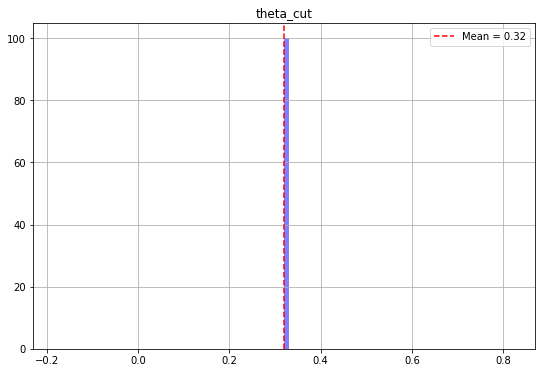

Bin center 0.015492272204486613 TeV


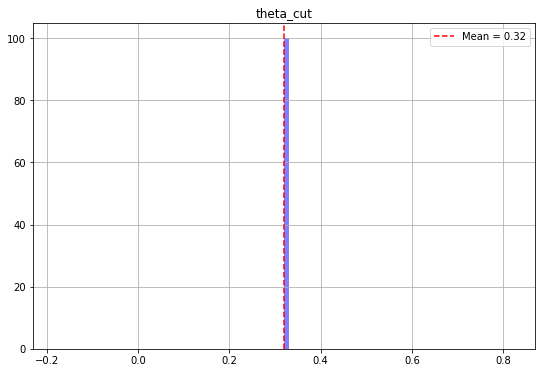

Bin center 0.016222400499493375 TeV


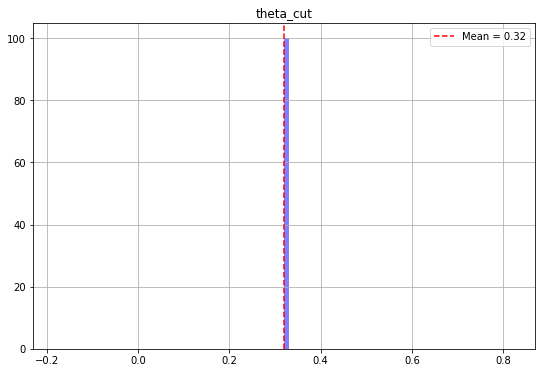

Bin center 0.016986938680934687 TeV


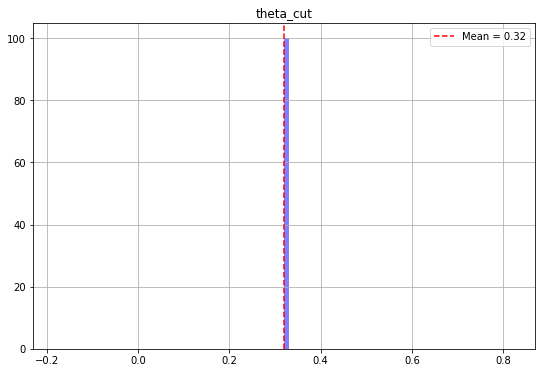

Bin center 0.0177875084367968 TeV


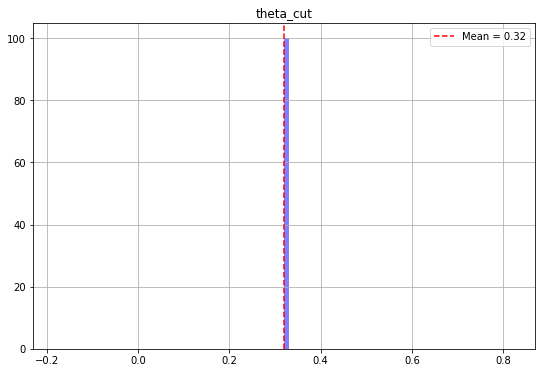

Bin center 0.018625807882866163 TeV


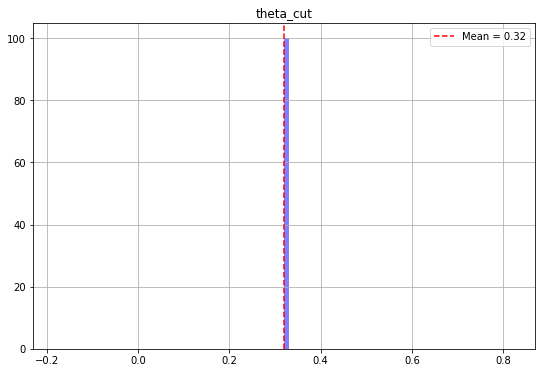

Bin center 0.019503615164660648 TeV


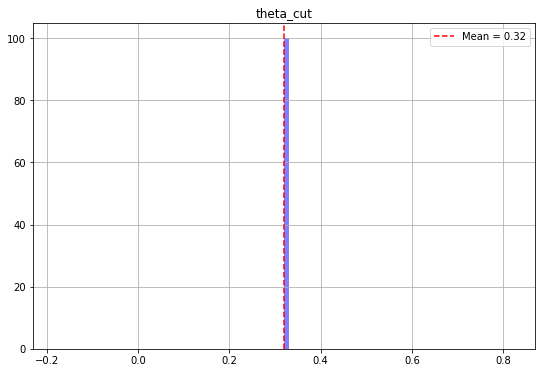

Bin center 0.02042279222911461 TeV


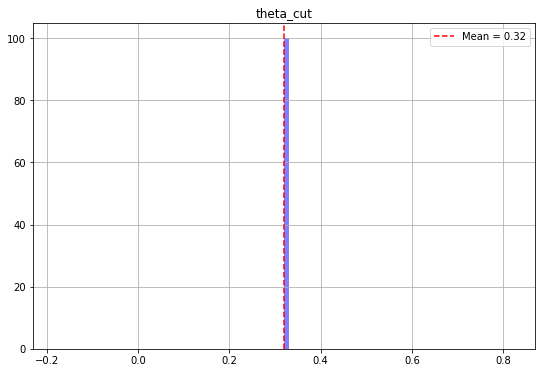

Bin center 0.021385288774017977 TeV


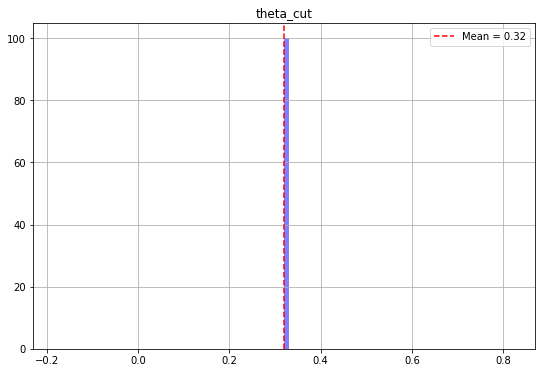

Bin center 0.022393146383586644 TeV


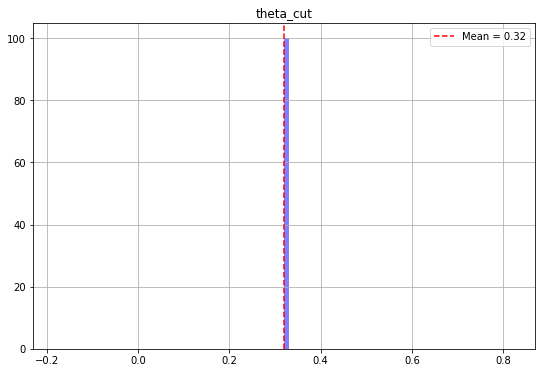

Bin center 0.023448502858936335 TeV


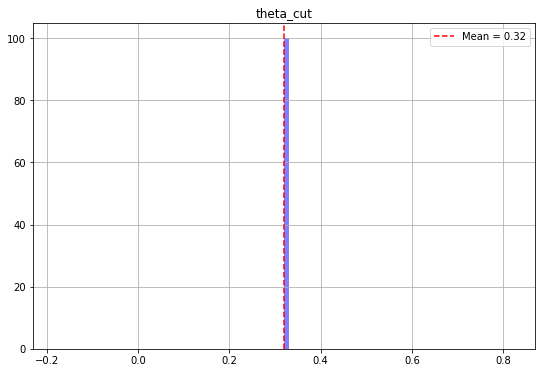

Bin center 0.024553596752645374 TeV


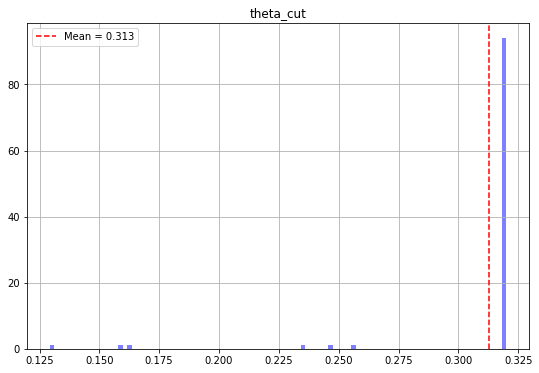

Bin center 0.025710772117024834 TeV


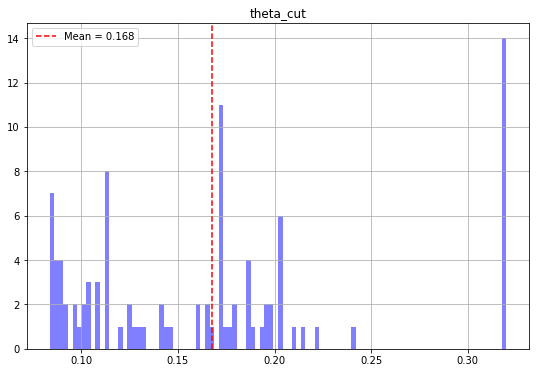

Bin center 0.026922483476167765 TeV


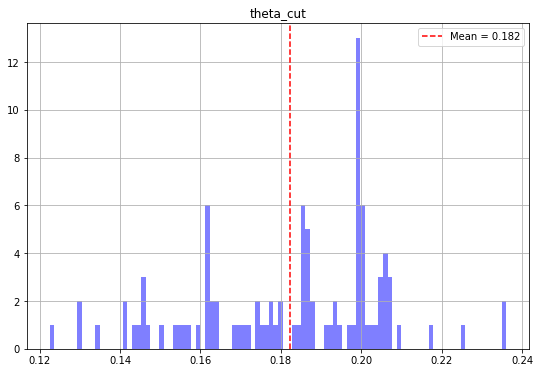

Bin center 0.02819130103232389 TeV


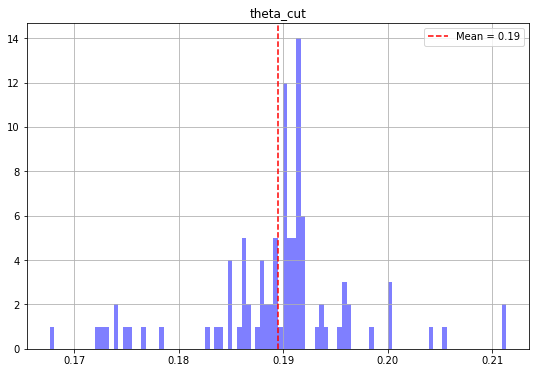

Bin center 0.02951991611764314 TeV


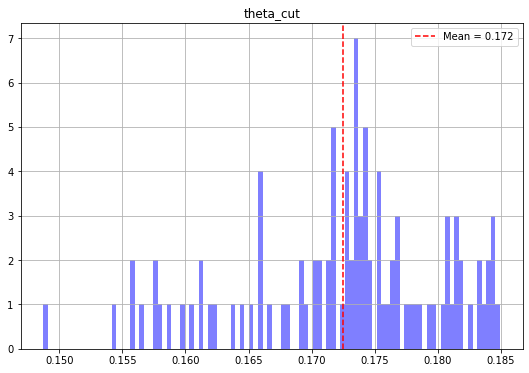

Bin center 0.03091114690285201 TeV


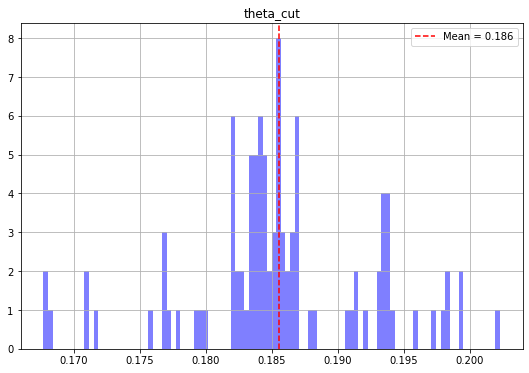

Bin center 0.03236794437497148 TeV


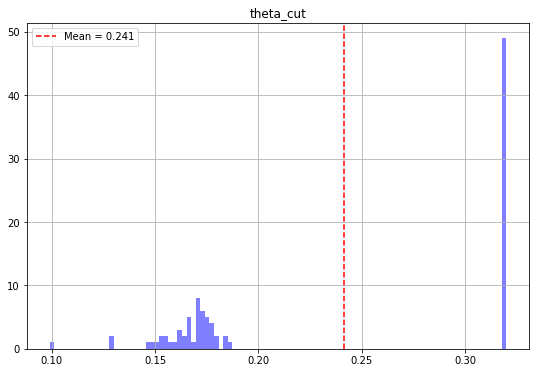

Bin center 0.03389339859675617 TeV


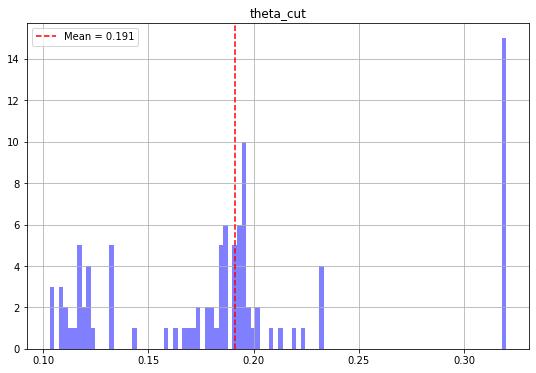

Bin center 0.03549074526113169 TeV


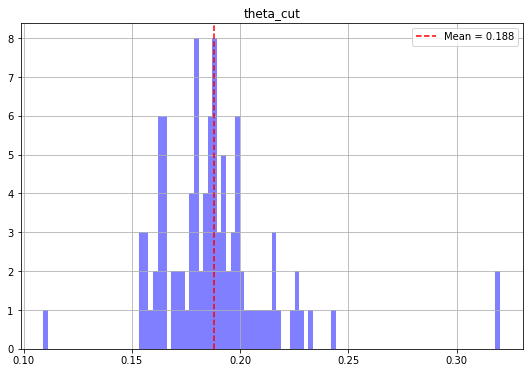

Bin center 0.03716337255453317 TeV


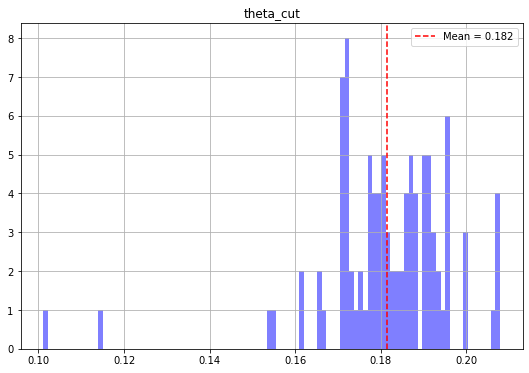

Bin center 0.03891482834370297 TeV


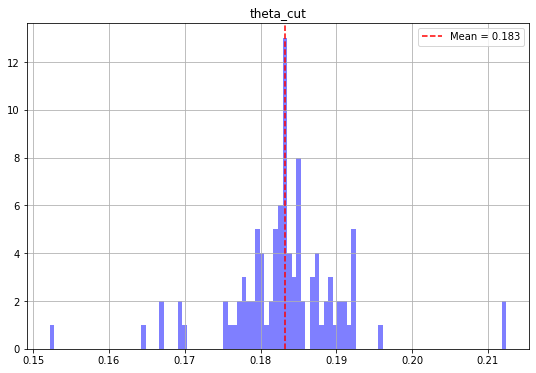

Bin center 0.04074882770119169 TeV


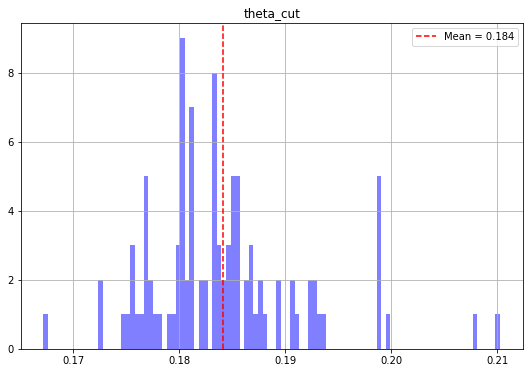

Bin center 0.042669260785525125 TeV


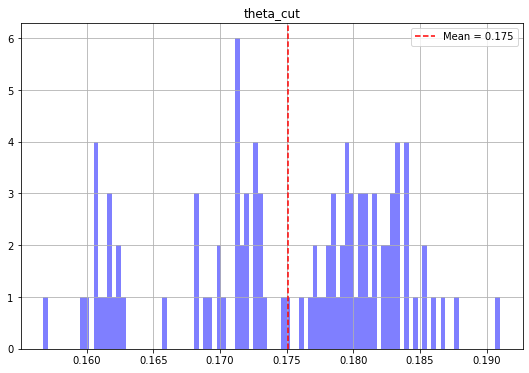

Bin center 0.04468020109275211 TeV


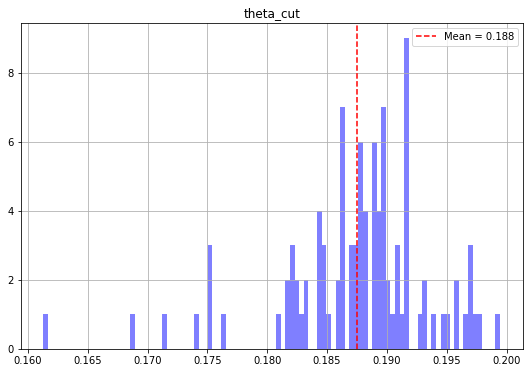

Bin center 0.04678591409687573 TeV


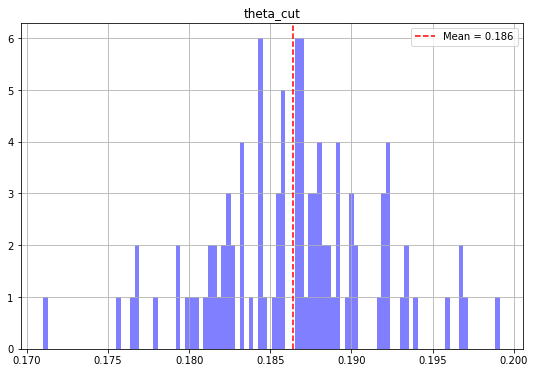

Bin center 0.048990866297495606 TeV


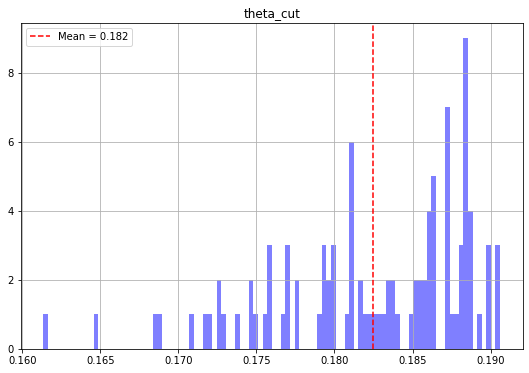

Bin center 0.05129973469385232 TeV


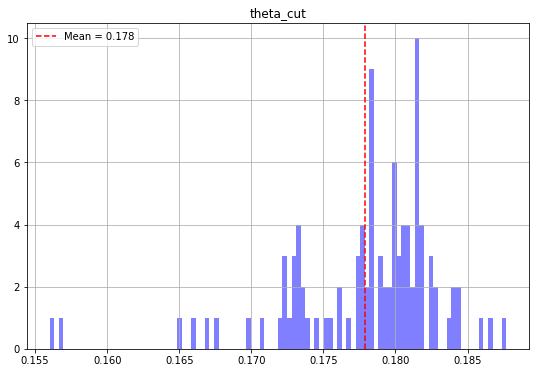

Bin center 0.05371741670536993 TeV


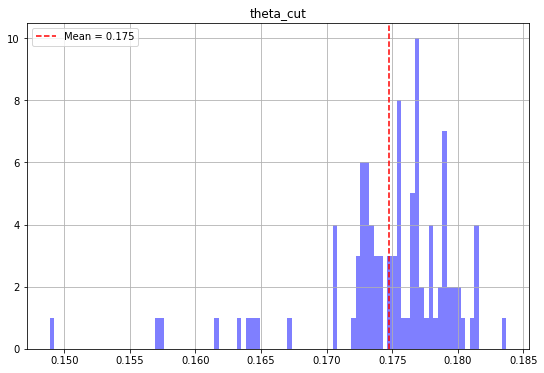

Bin center 0.05624904055973916 TeV


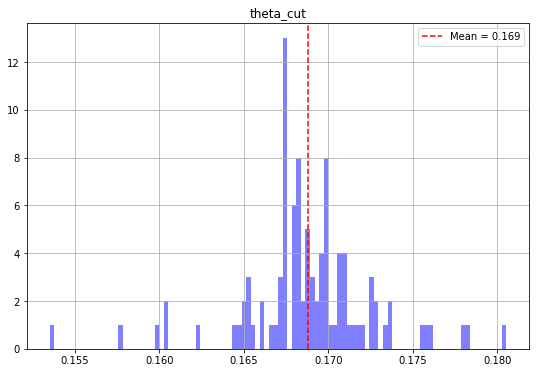

Bin center 0.058899976170575824 TeV


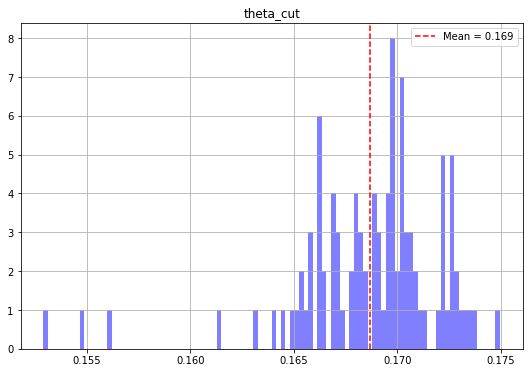

Bin center 0.061675846527727646 TeV


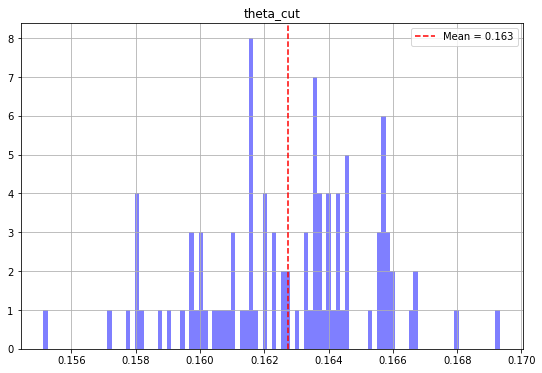

Bin center 0.06458253962438956 TeV


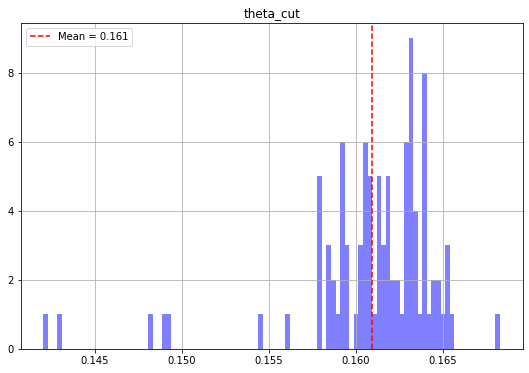

Bin center 0.06762622094632674 TeV


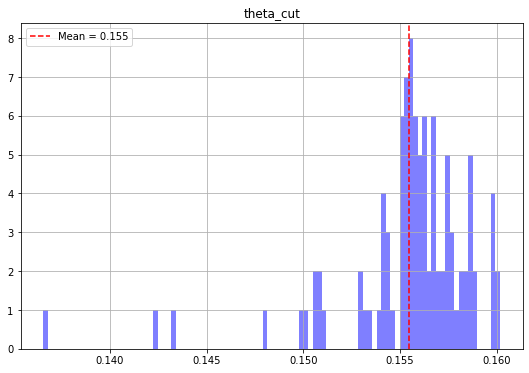

Bin center 0.07081334654969645 TeV


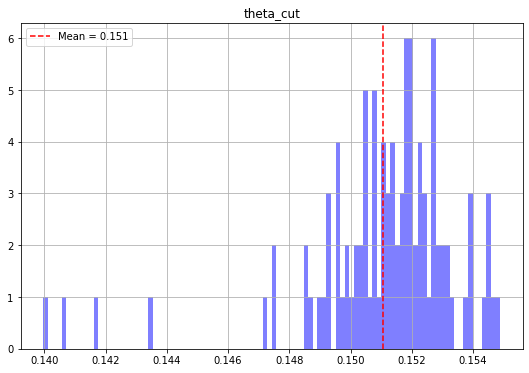

Bin center 0.07415067675520882 TeV


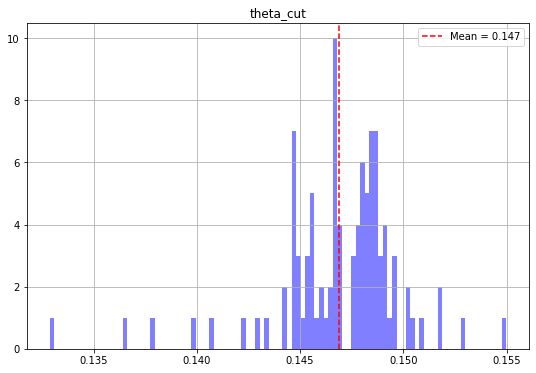

Bin center 0.07764529048767341 TeV


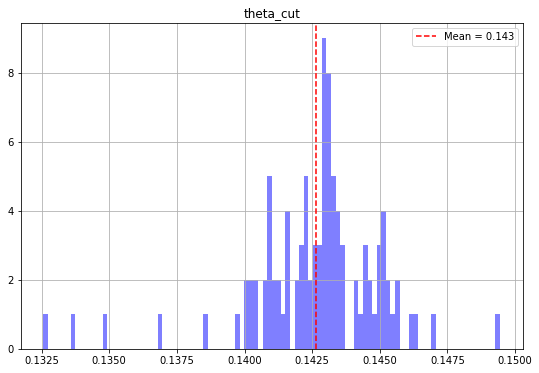

Bin center 0.08130460029134778 TeV


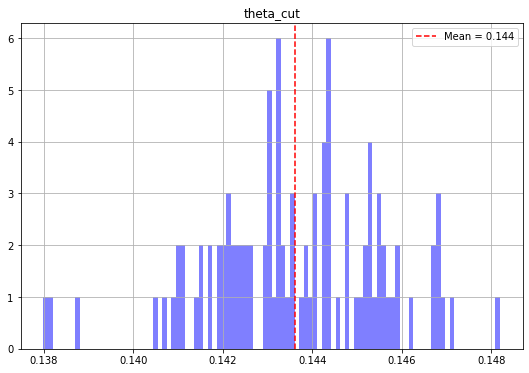

Bin center 0.08513636805293776 TeV


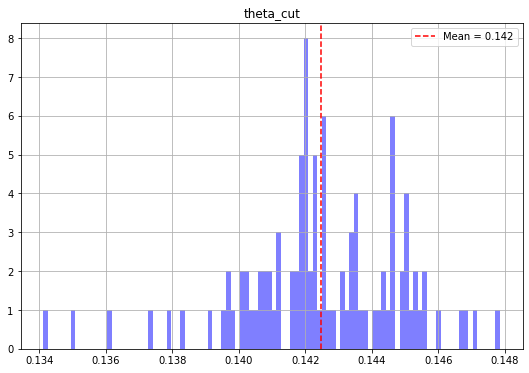

Bin center 0.08914872146559968 TeV


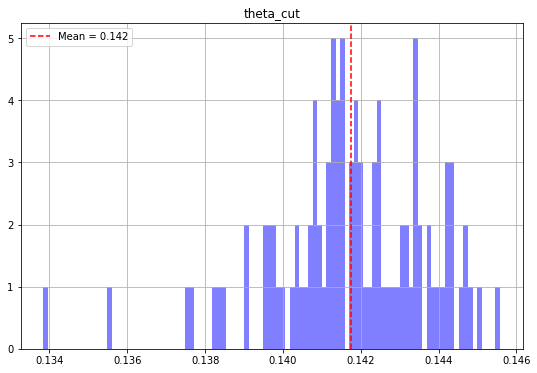

Bin center 0.09335017126886747 TeV


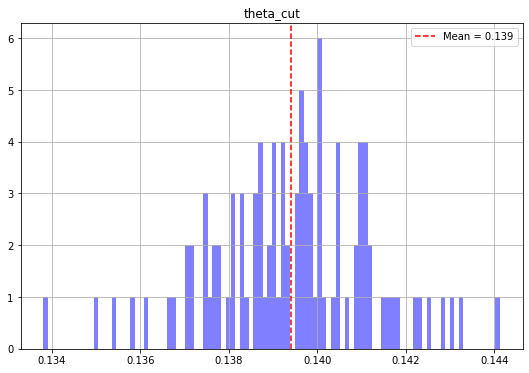

Bin center 0.09774962930107199 TeV


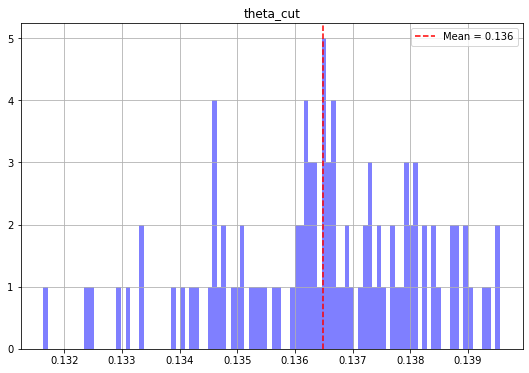

Bin center 0.10235642740254519 TeV


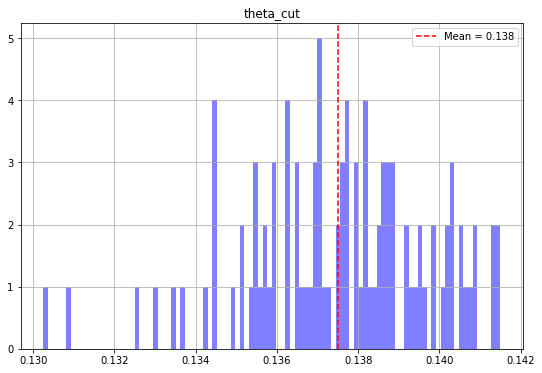

Bin center 0.10718033720970445 TeV


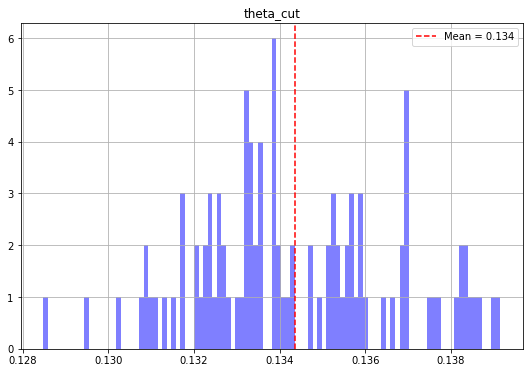

Bin center 0.11223159088200363 TeV


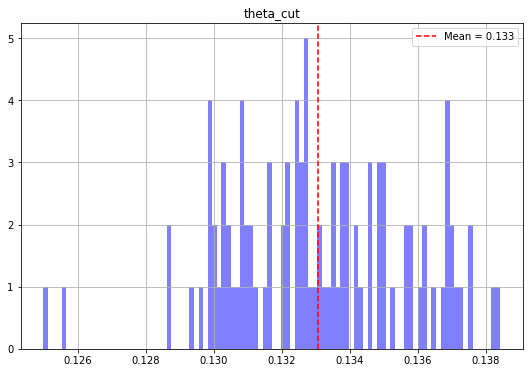

Bin center 0.11752090280571503 TeV


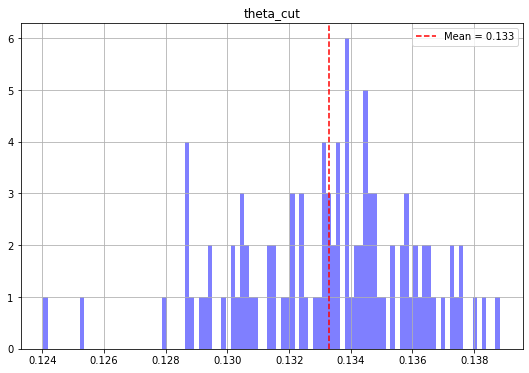

Bin center 0.12305949232057928 TeV


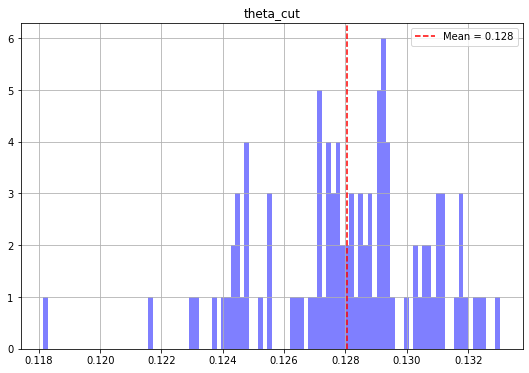

Bin center 0.128859107517529 TeV


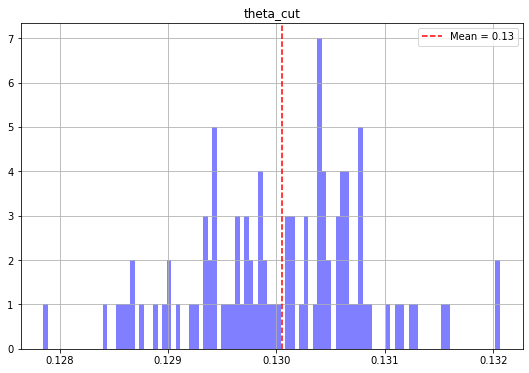

Bin center 0.1349320501579649 TeV


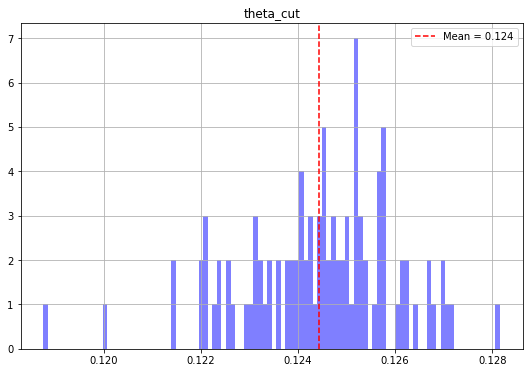

Bin center 0.14129120176744095 TeV


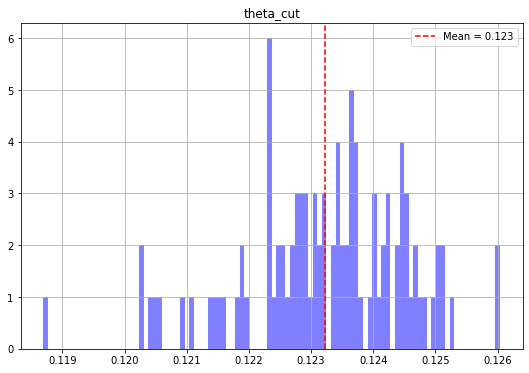

Bin center 0.14795005095910713 TeV


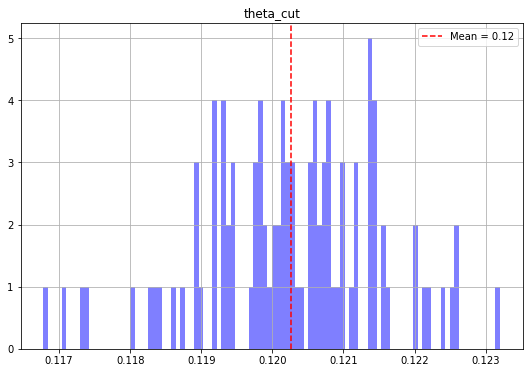

Bin center 0.15492272204486646 TeV


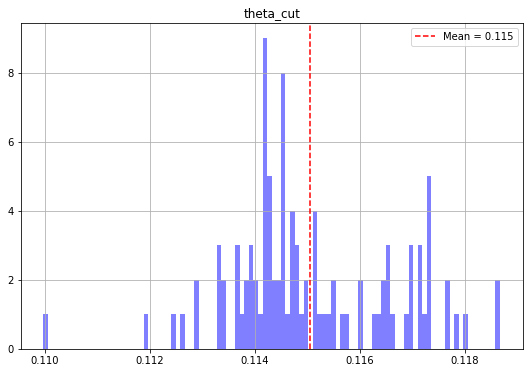

Bin center 0.1622240049949341 TeV


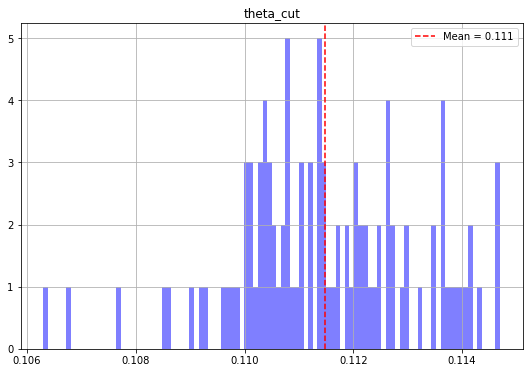

Bin center 0.1698693868093472 TeV


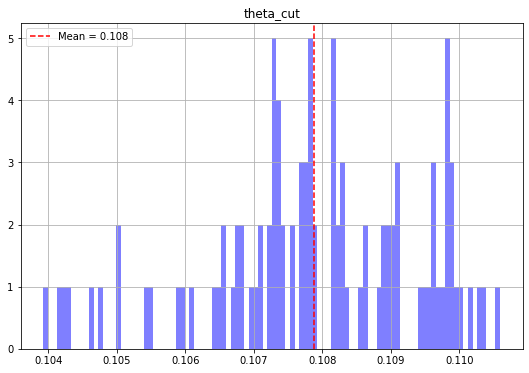

Bin center 0.1778750843679684 TeV


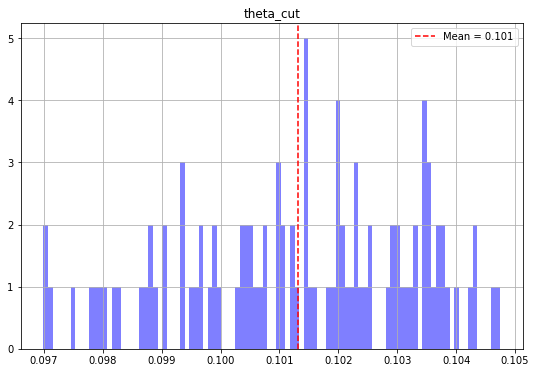

Bin center 0.18625807882866202 TeV


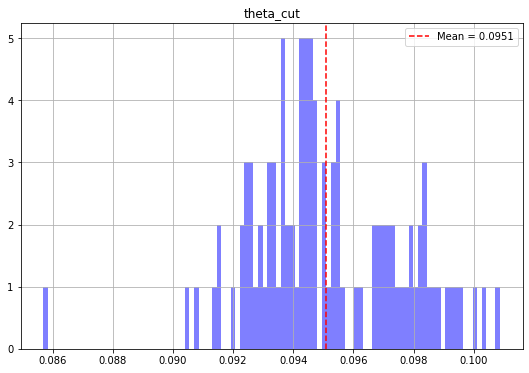

Bin center 0.19503615164660687 TeV


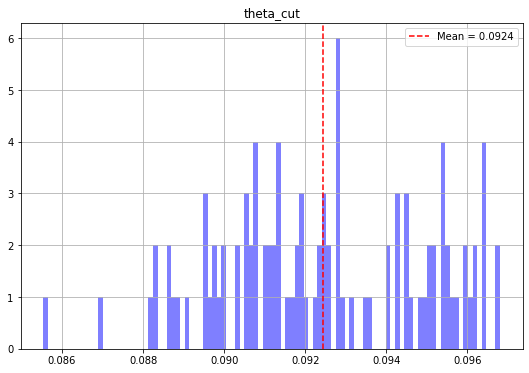

Bin center 0.2042279222911465 TeV


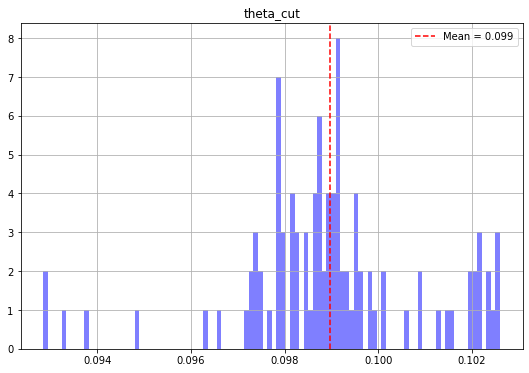

Bin center 0.2138528877401802 TeV


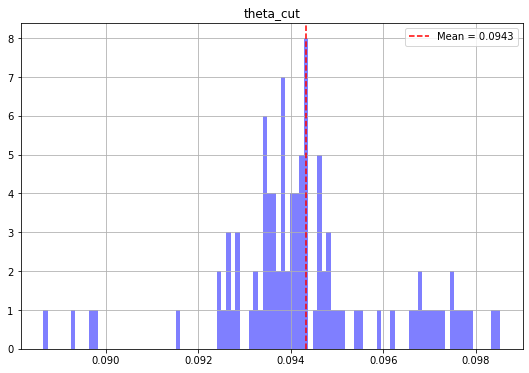

Bin center 0.22393146383586687 TeV


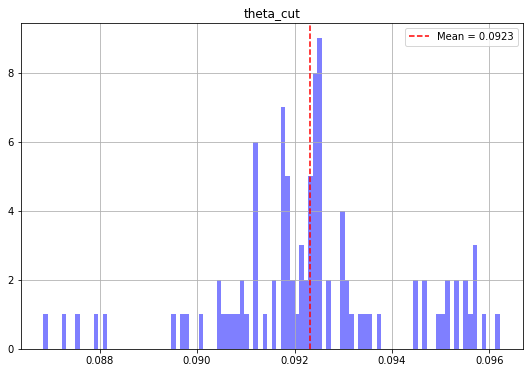

Bin center 0.23448502858936382 TeV


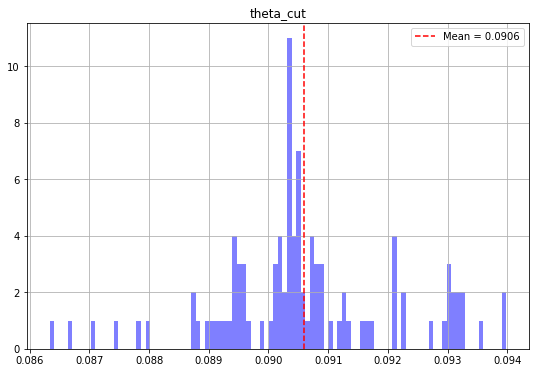

Bin center 0.24553596752645424 TeV


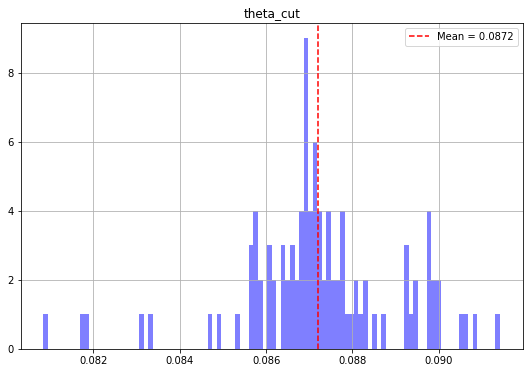

Bin center 0.2571077211702488 TeV


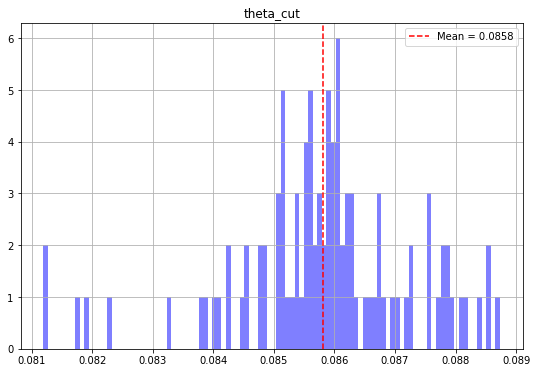

Bin center 0.26922483476167824 TeV


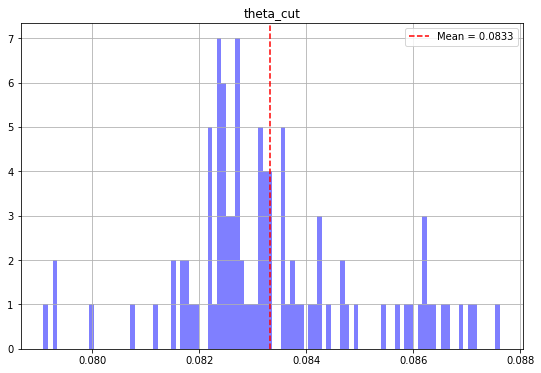

Bin center 0.28191301032323945 TeV


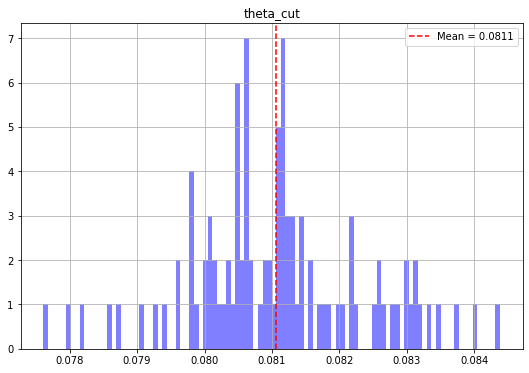

Bin center 0.29519916117643197 TeV


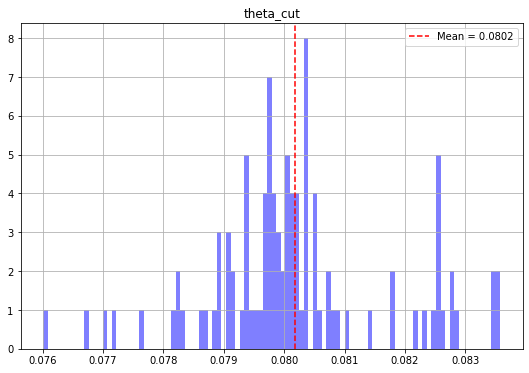

Bin center 0.3091114690285207 TeV


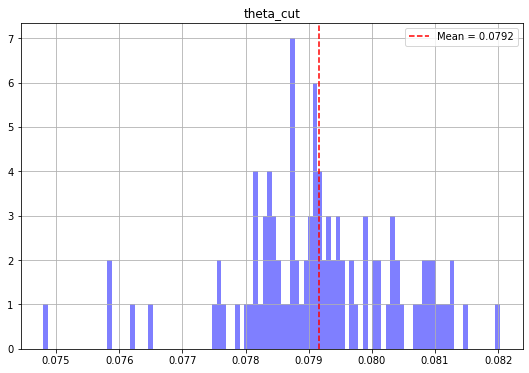

Bin center 0.32367944374971547 TeV


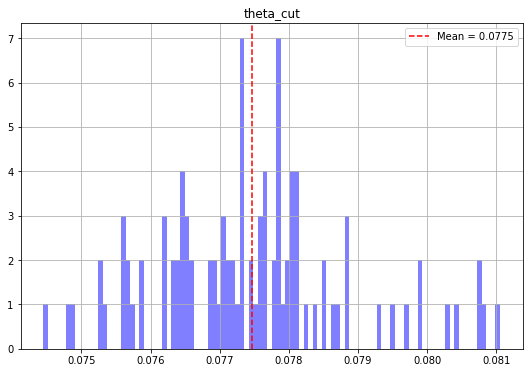

Bin center 0.3389339859675624 TeV


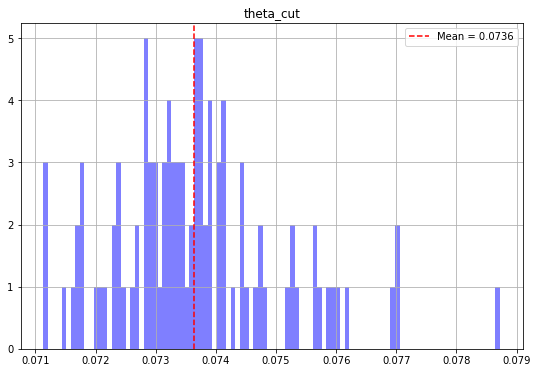

Bin center 0.3549074526113176 TeV


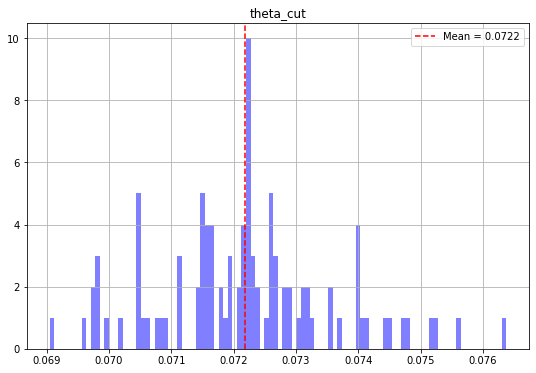

Bin center 0.37163372554533247 TeV


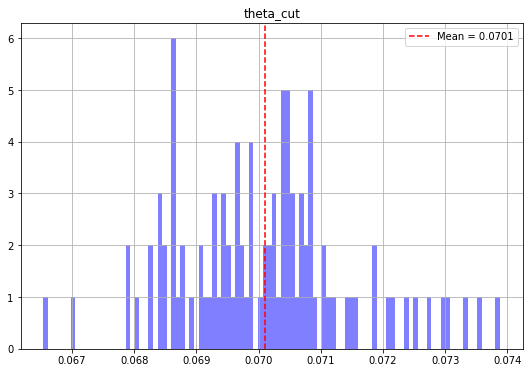

Bin center 0.38914828343703045 TeV


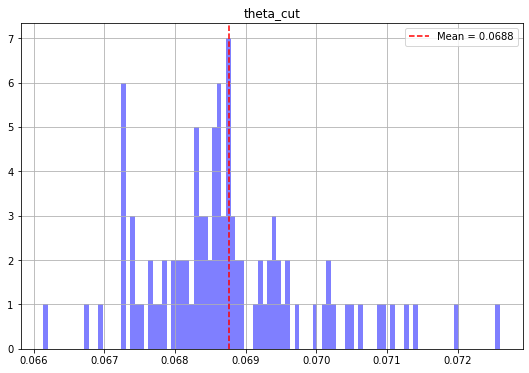

Bin center 0.4074882770119177 TeV


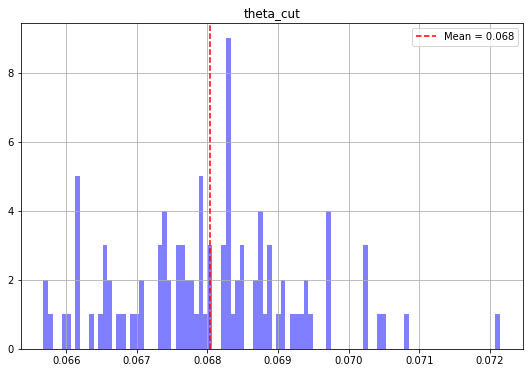

Bin center 0.4266926078552521 TeV


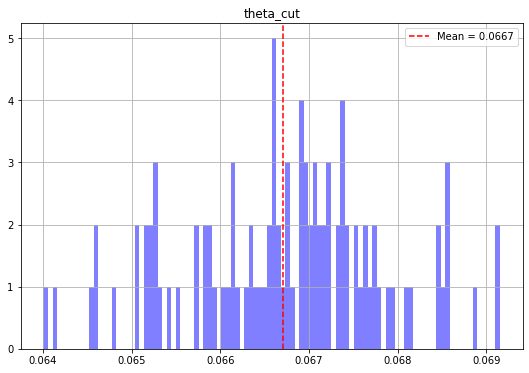

Bin center 0.44680201092752203 TeV


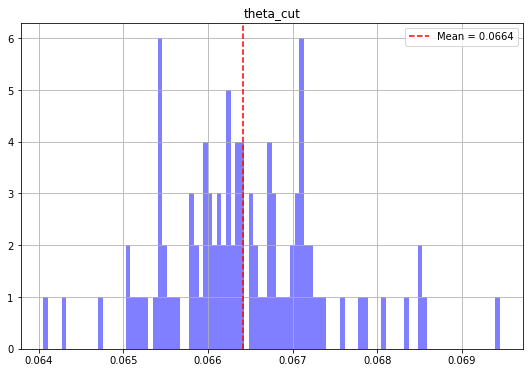

Bin center 0.46785914096875825 TeV


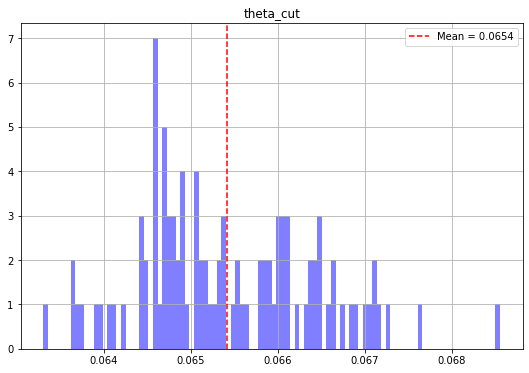

Bin center 0.489908662974957 TeV


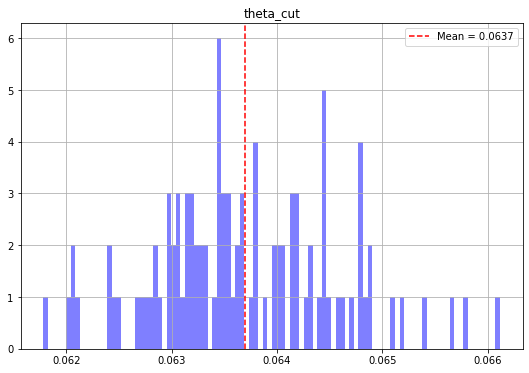

Bin center 0.5129973469385243 TeV


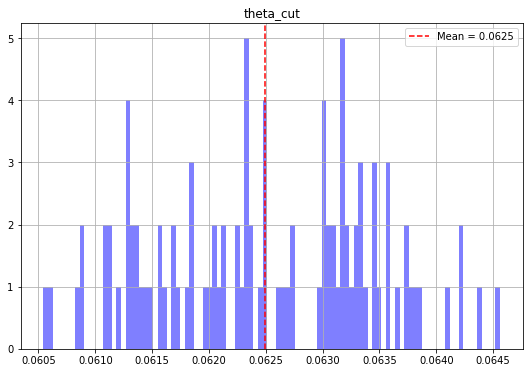

Bin center 0.5371741670537005 TeV


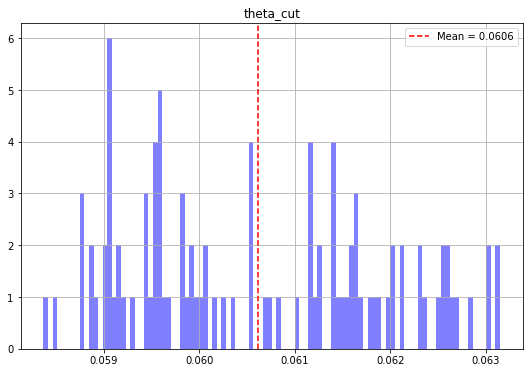

Bin center 0.5624904055973927 TeV


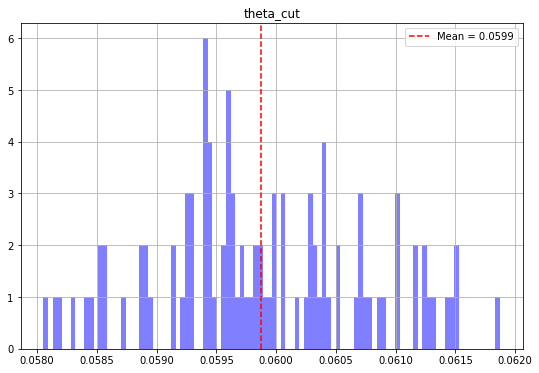

Bin center 0.5889997617057594 TeV


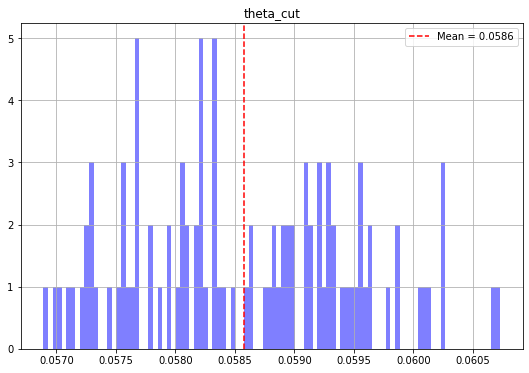

Bin center 0.6167584652772777 TeV


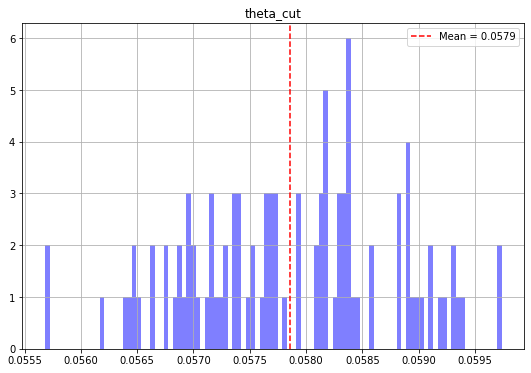

Bin center 0.645825396243897 TeV


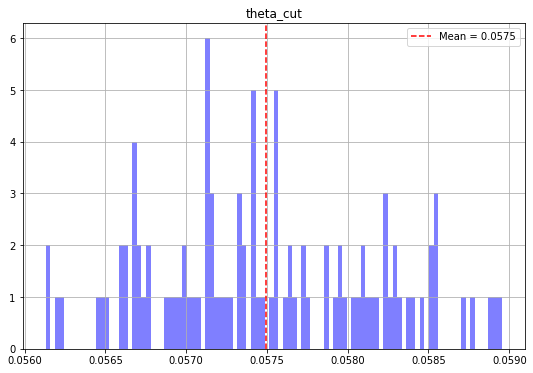

Bin center 0.6762622094632688 TeV


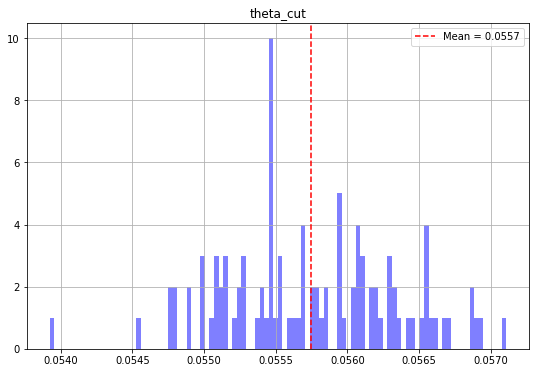

Bin center 0.708133465496966 TeV


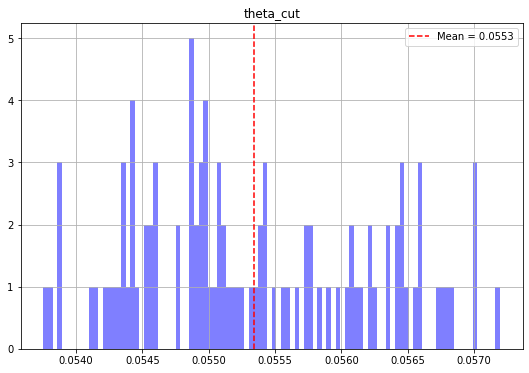

Bin center 0.7415067675520897 TeV


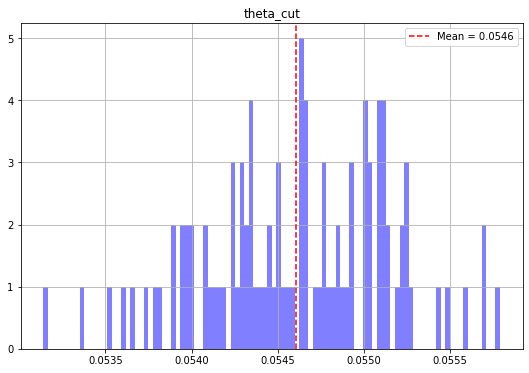

Bin center 0.7764529048767357 TeV


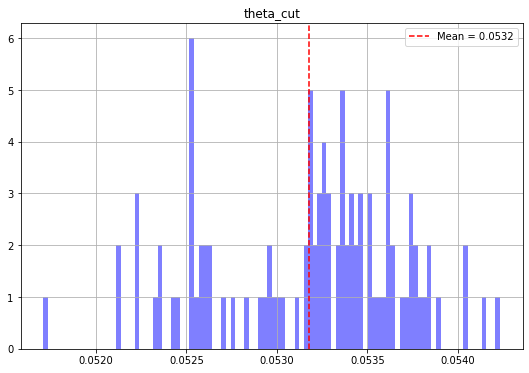

Bin center 0.8130460029134794 TeV


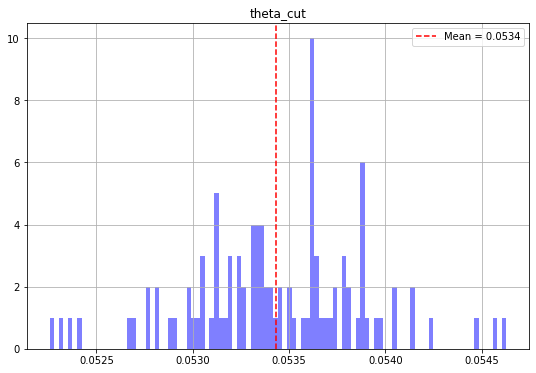

Bin center 0.8513636805293792 TeV


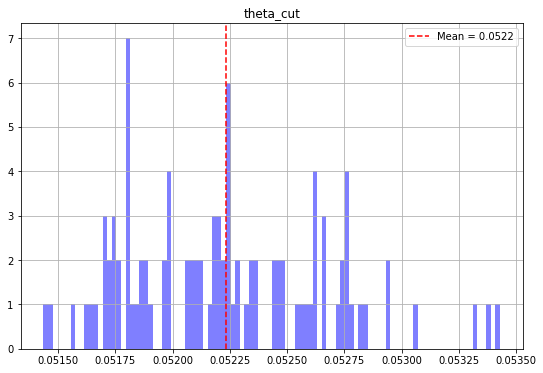

Bin center 0.8914872146559988 TeV


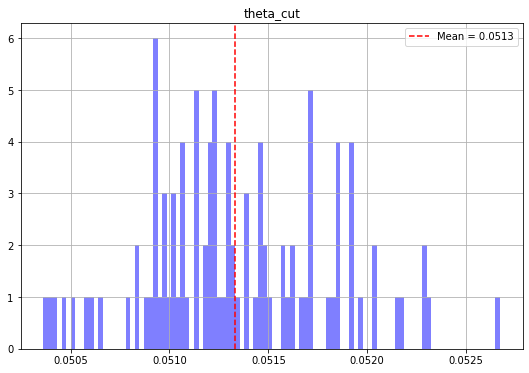

Bin center 0.9335017126886767 TeV


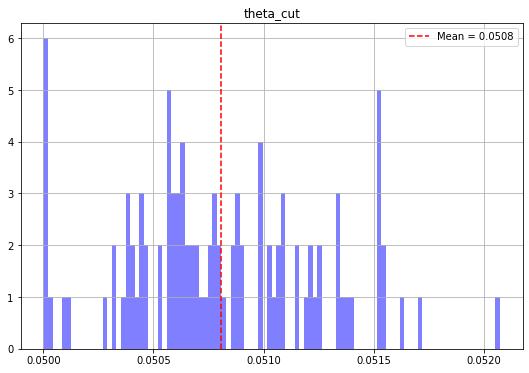

Bin center 0.9774962930107218 TeV


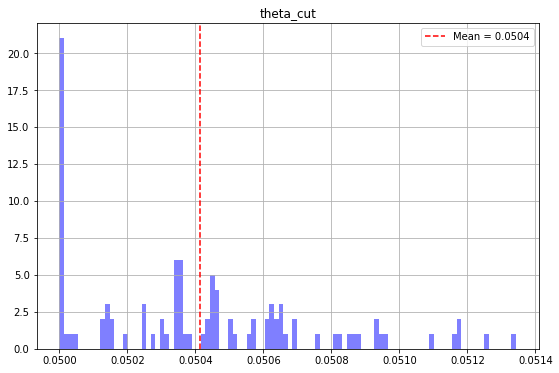

Bin center 1.0235642740254538 TeV


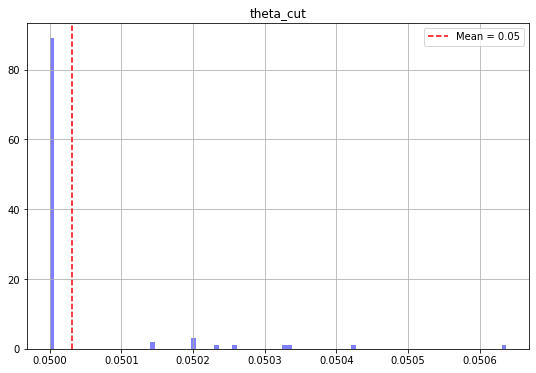

Bin center 1.0718033720970466 TeV


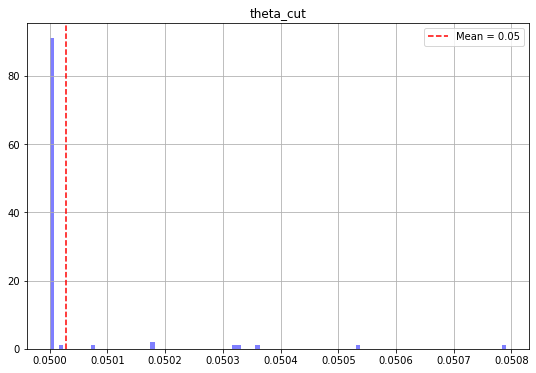

Bin center 1.1223159088200385 TeV


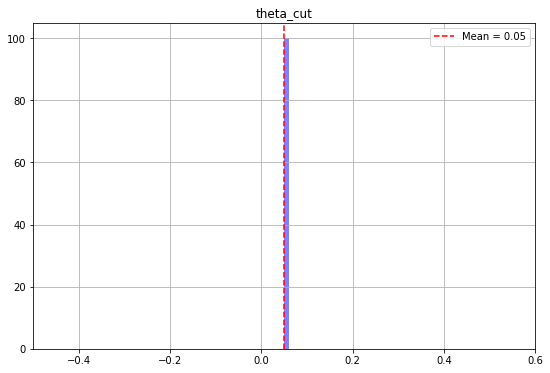

Bin center 1.1752090280571528 TeV


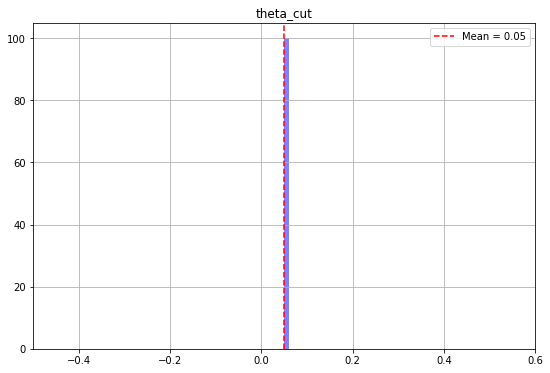

Bin center 1.2305949232057953 TeV


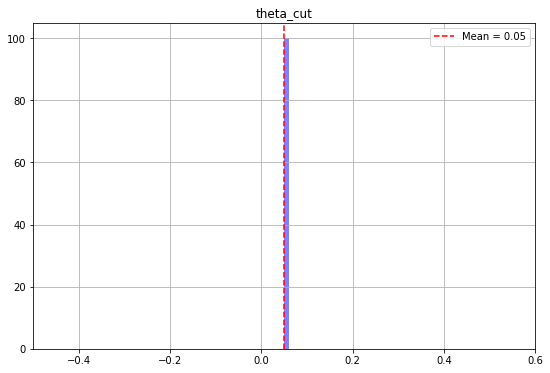

Bin center 1.2885910751752927 TeV


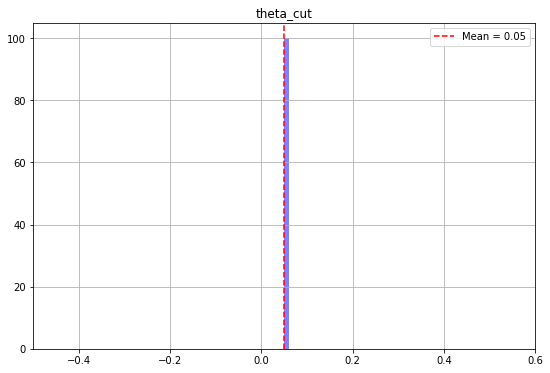

Bin center 1.3493205015796519 TeV


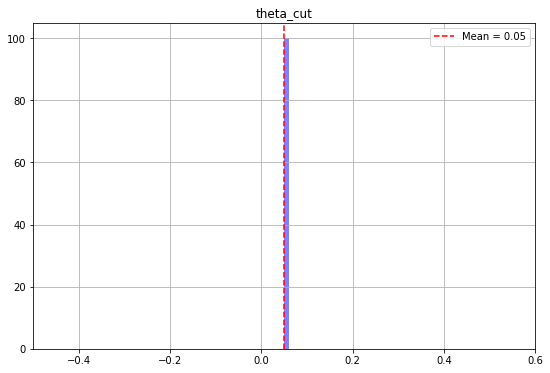

Bin center 1.4129120176744125 TeV


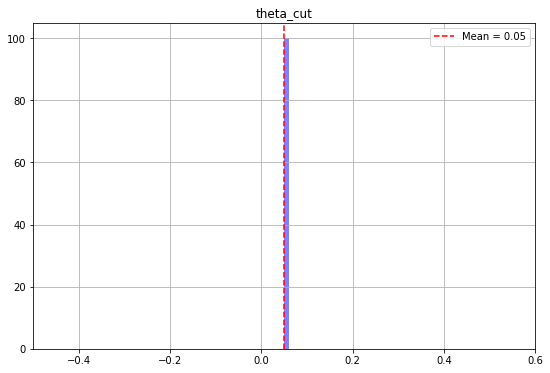

Bin center 1.4795005095910745 TeV


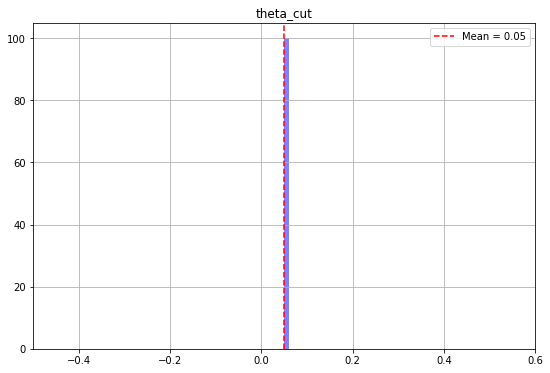

Bin center 1.549227220448668 TeV


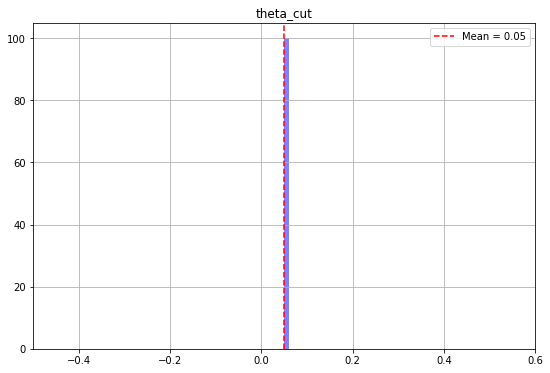

Bin center 1.6222400499493443 TeV


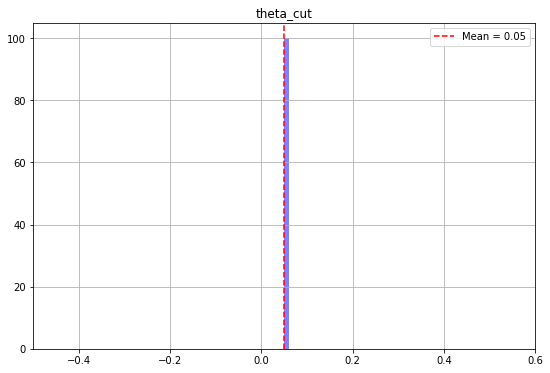

Bin center 1.6986938680934758 TeV


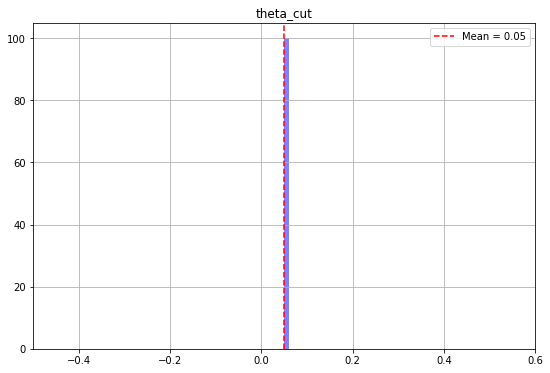

Bin center 1.7787508436796875 TeV


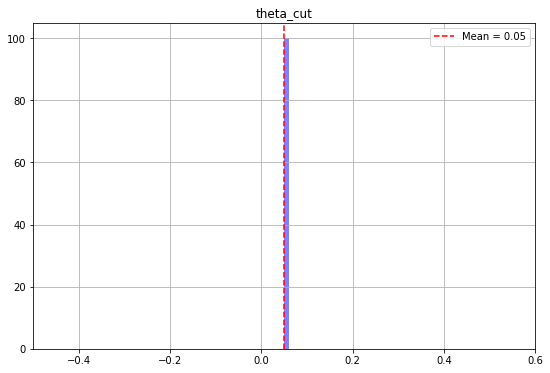

Bin center 1.8625807882866239 TeV


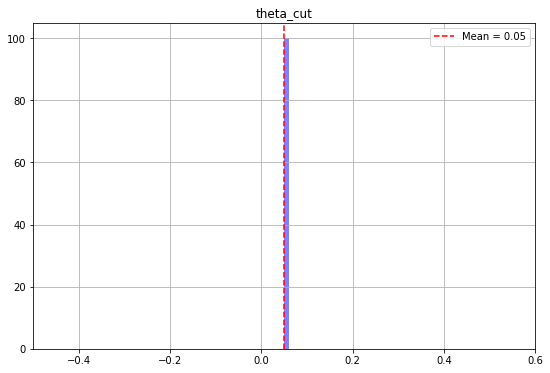

Bin center 1.9503615164660726 TeV


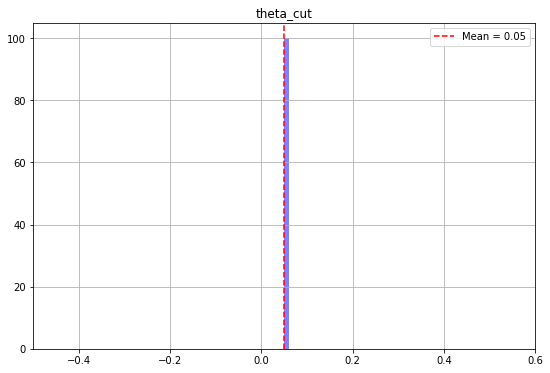

Bin center 2.0422792229114695 TeV


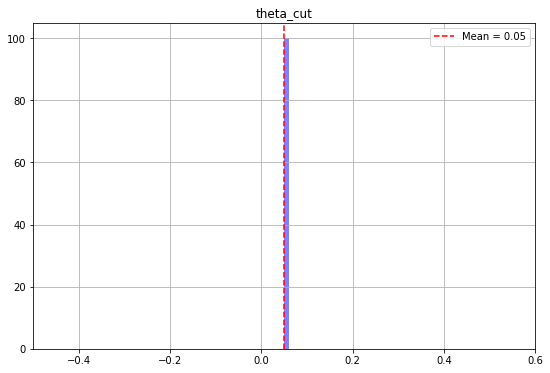

Bin center 2.1385288774018063 TeV


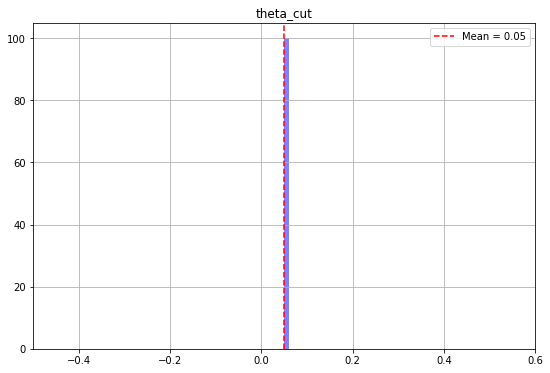

Bin center 2.2393146383586737 TeV


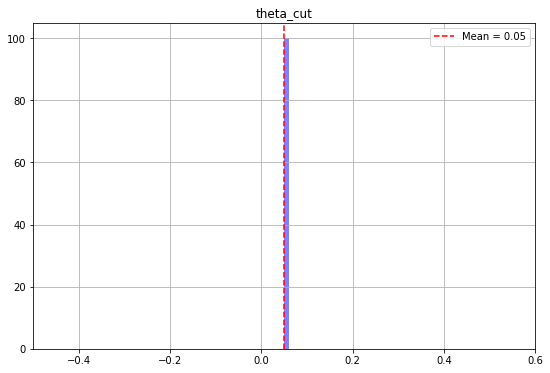

Bin center 2.344850285893643 TeV


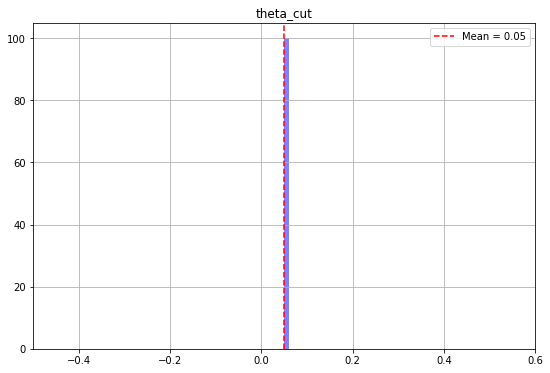

Bin center 2.4553596752645475 TeV


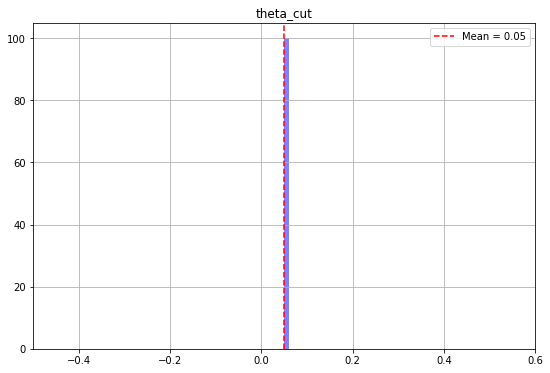

Bin center 2.5710772117024936 TeV


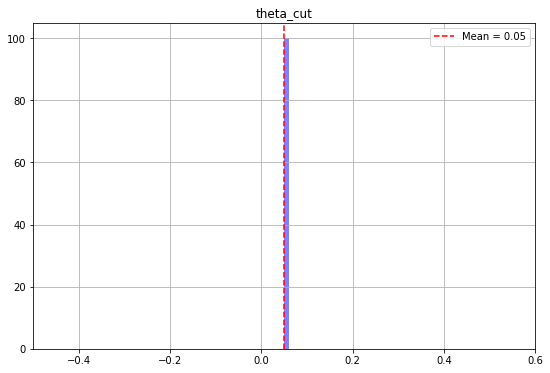

Bin center 2.6922483476167876 TeV


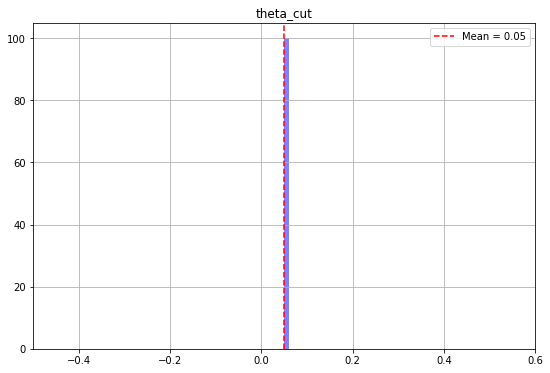

Bin center 2.8191301032324003 TeV


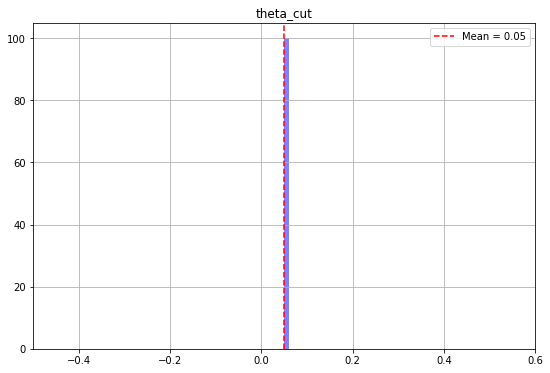

Bin center 2.951991611764326 TeV


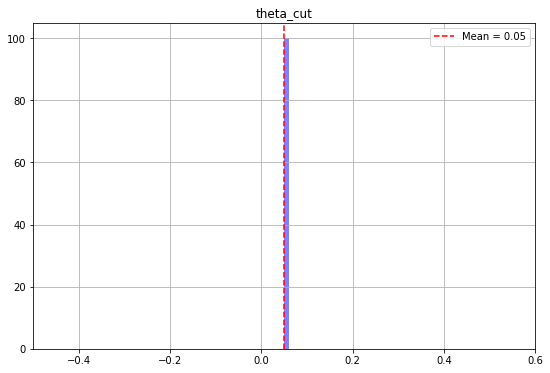

Bin center 3.0911146902852136 TeV


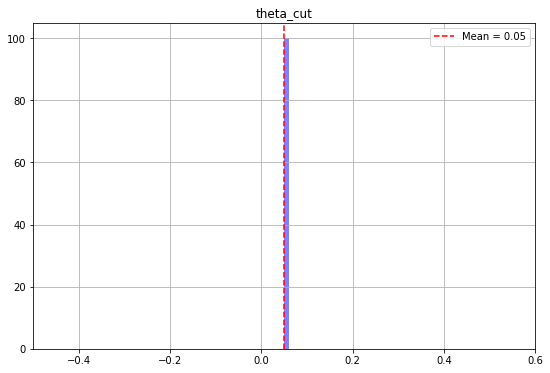

Bin center 3.236794437497162 TeV


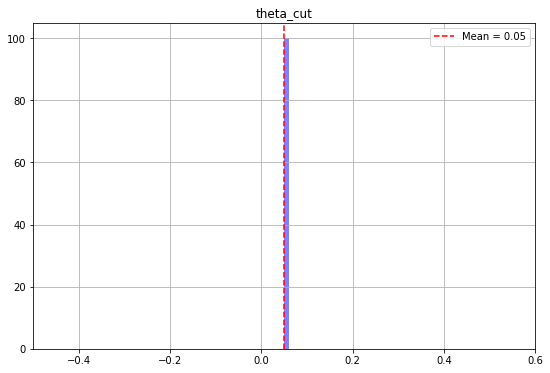

Bin center 3.3893398596756312 TeV


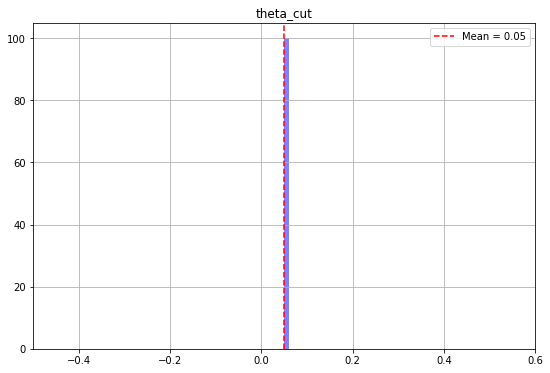

Bin center 3.5490745261131833 TeV


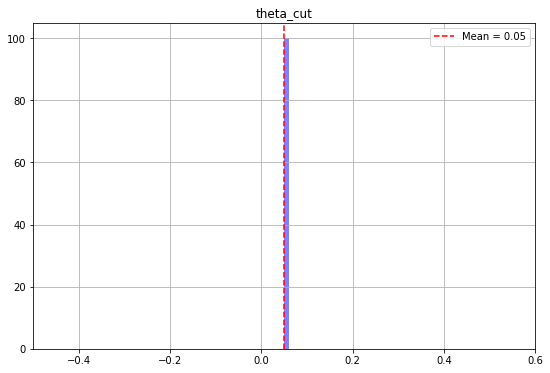

Bin center 3.7163372554533325 TeV


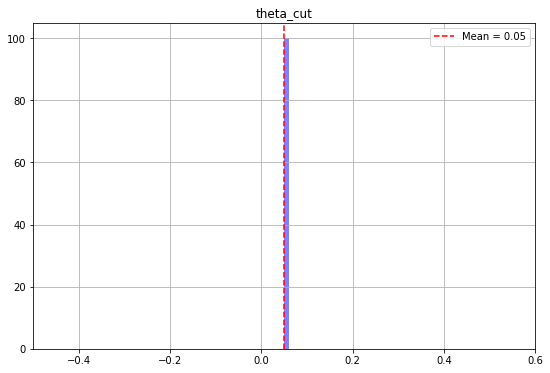

Bin center 3.8914828343703127 TeV


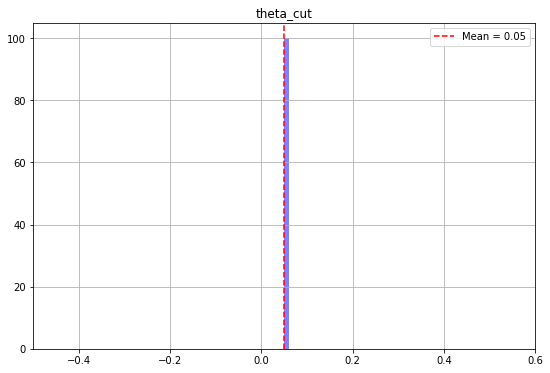

Bin center 4.074882770119185 TeV


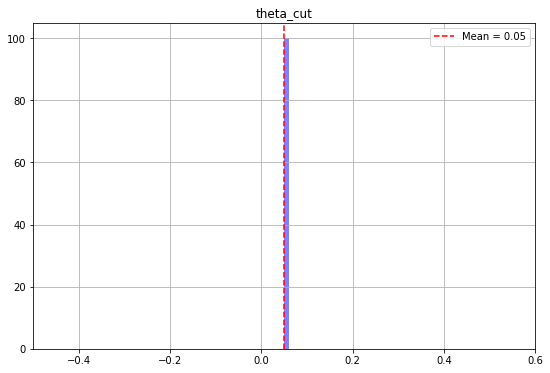

Bin center 4.26692607855253 TeV


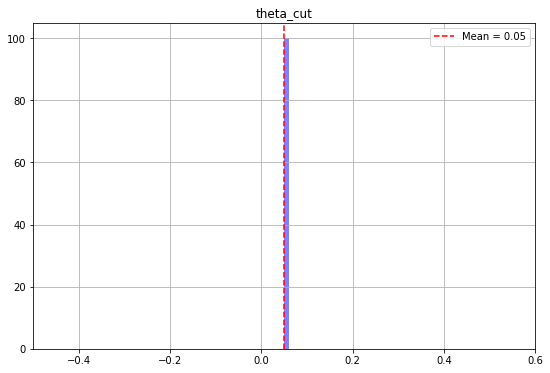

Bin center 4.468020109275229 TeV


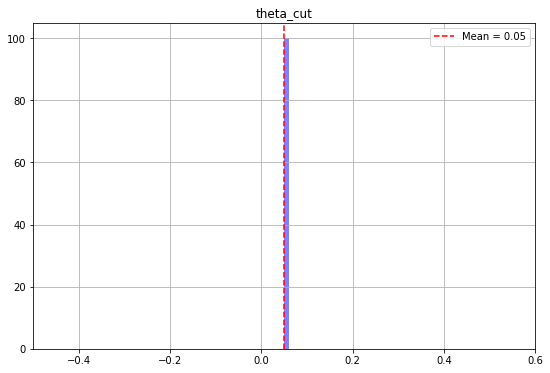

Bin center 4.678591409687592 TeV


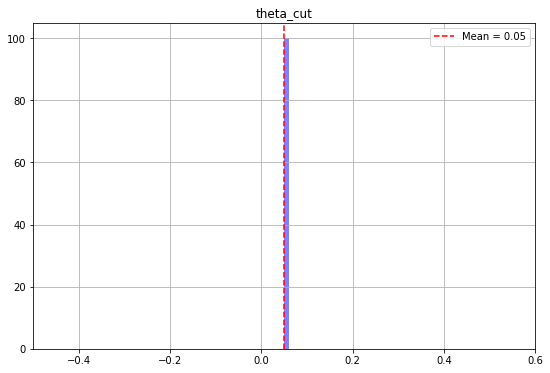

Bin center 4.89908662974958 TeV


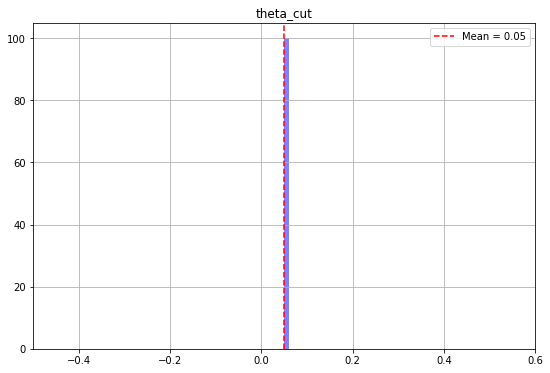

Bin center 5.129973469385253 TeV


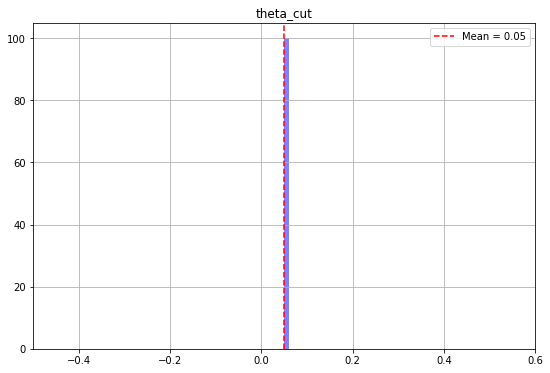

Bin center 5.371741670537016 TeV


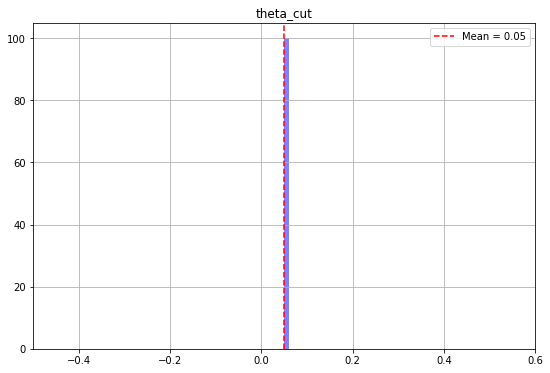

Bin center 5.624904055973939 TeV


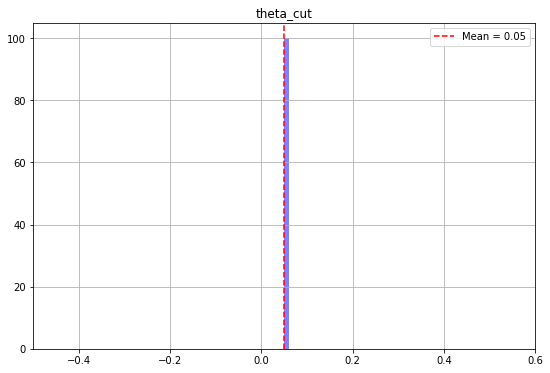

Bin center 5.889997617057606 TeV


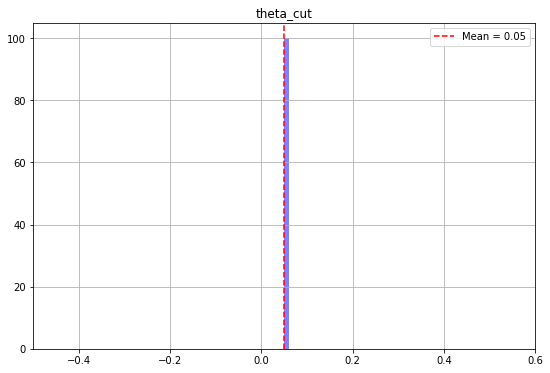

Bin center 6.16758465277279 TeV


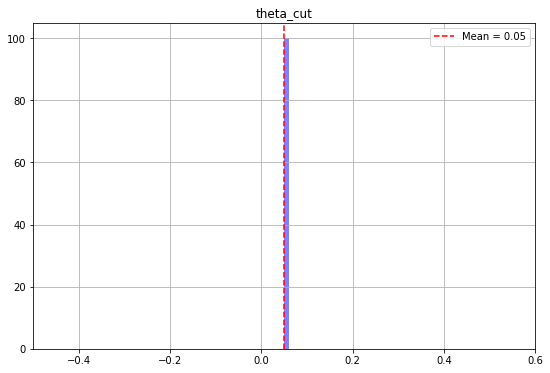

Bin center 6.458253962438984 TeV


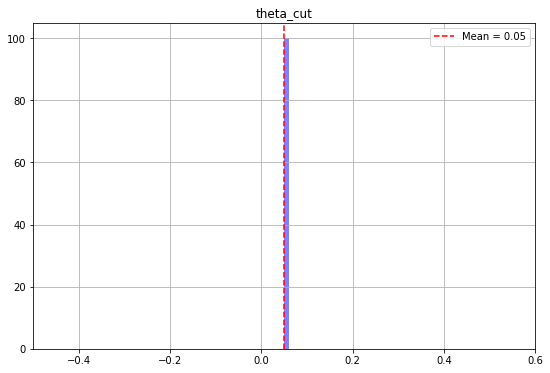

Bin center 6.762622094632702 TeV


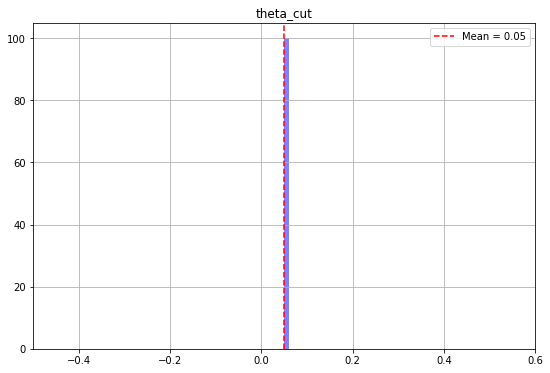

Bin center 7.081334654969674 TeV


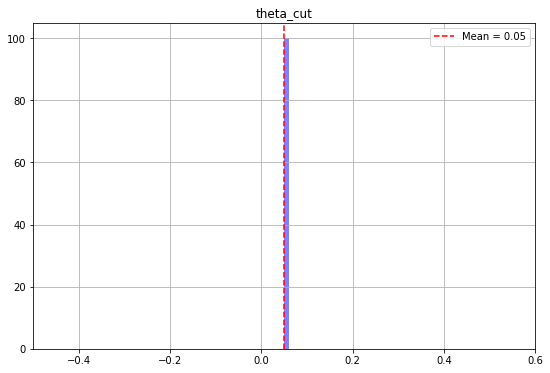

Bin center 7.415067675520913 TeV


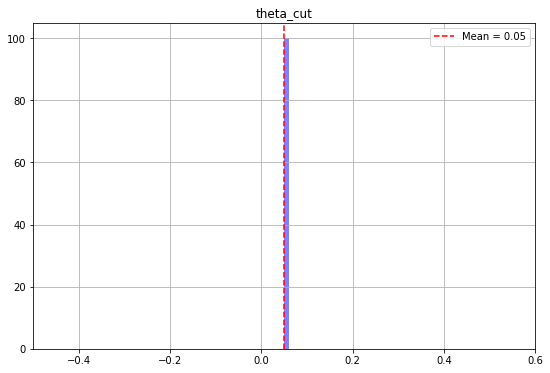

Bin center 7.764529048767372 TeV


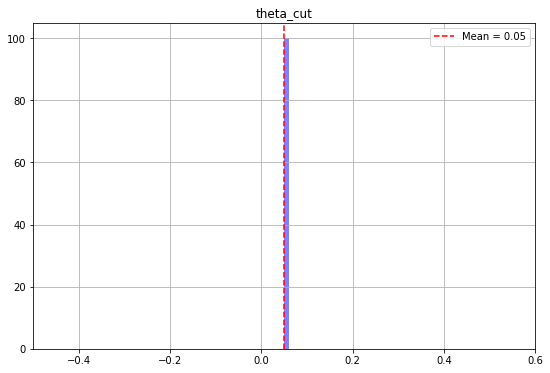

Bin center 8.130460029134811 TeV


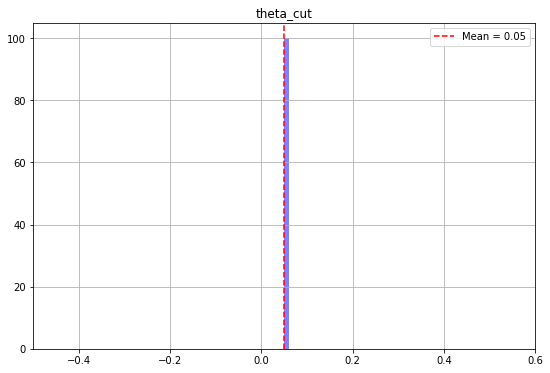

Bin center 8.51363680529381 TeV


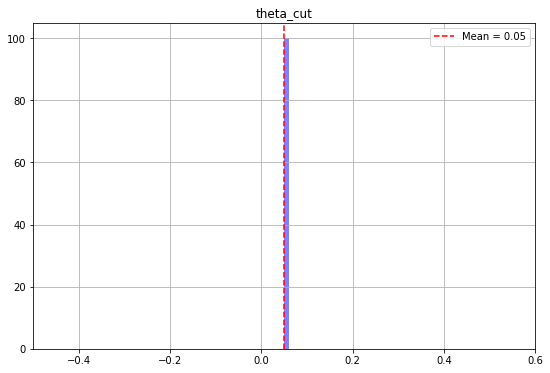

Bin center 8.914872146560006 TeV


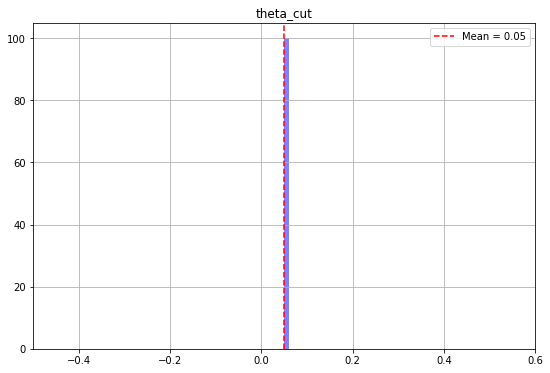

Bin center 9.335017126886786 TeV


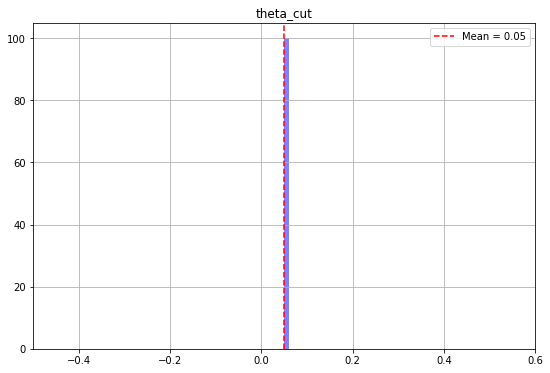

Bin center 9.77496293010724 TeV


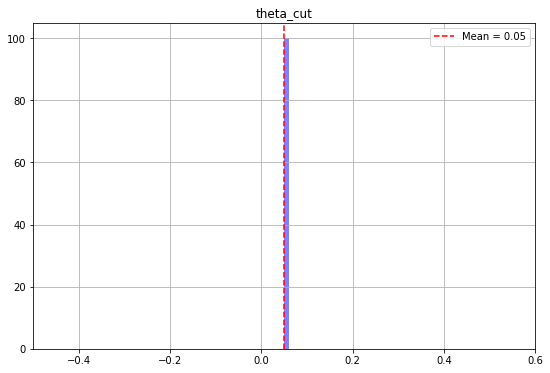

Bin center 10.235642740254562 TeV


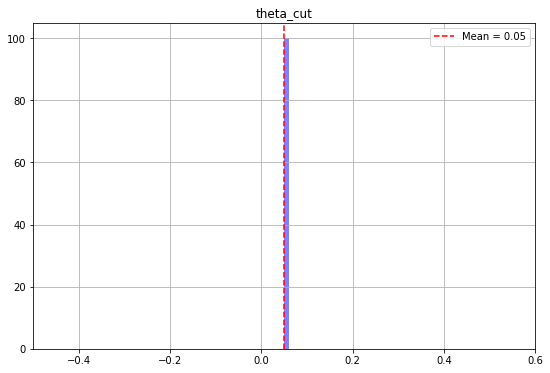

Bin center 10.718033720970489 TeV


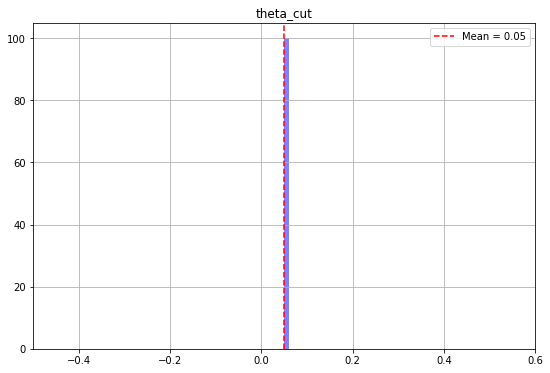

Bin center 11.223159088200408 TeV


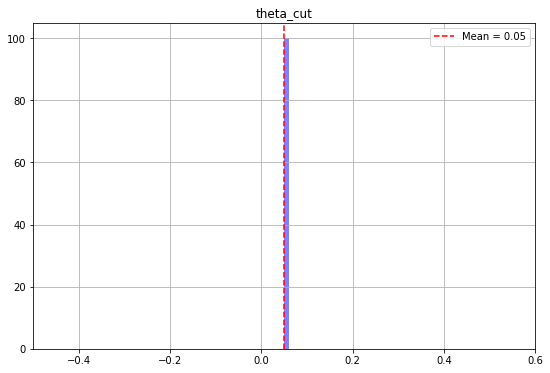

Bin center 11.752090280571553 TeV


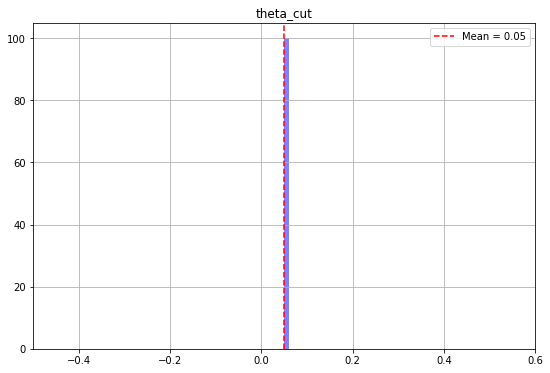

Bin center 12.30594923205798 TeV


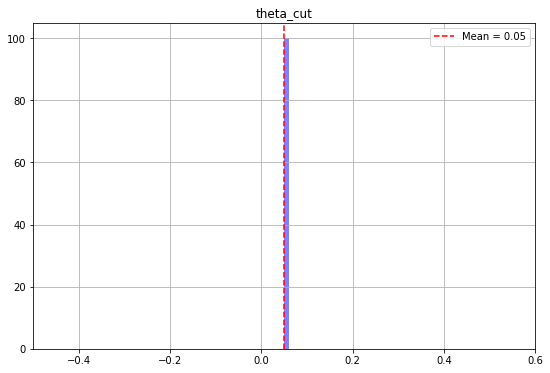

Bin center 12.885910751752954 TeV


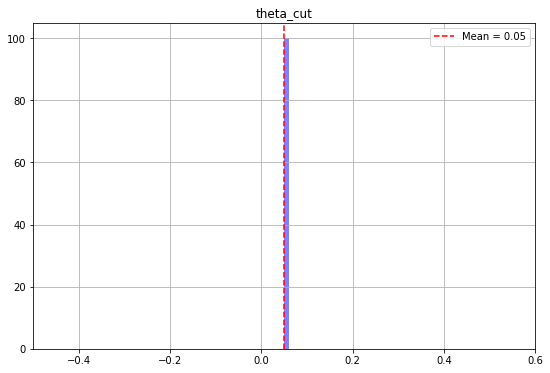

Bin center 13.493205015796546 TeV


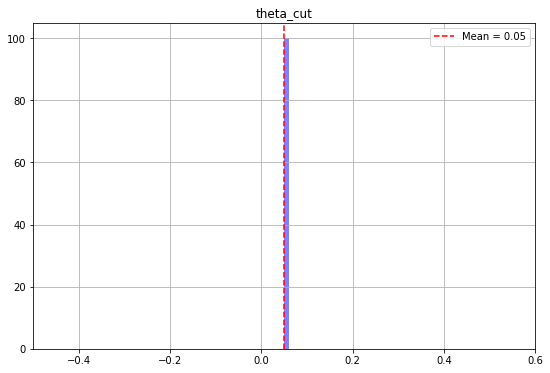

Bin center 14.129120176744152 TeV


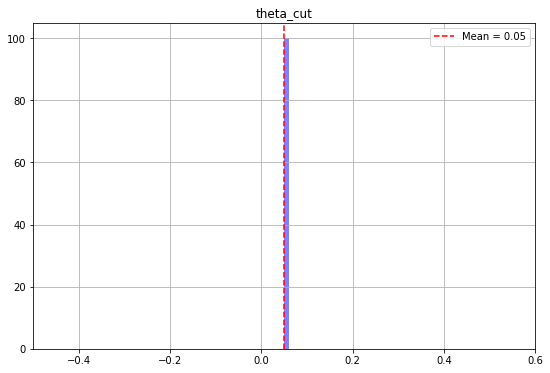

Bin center 14.795005095910774 TeV


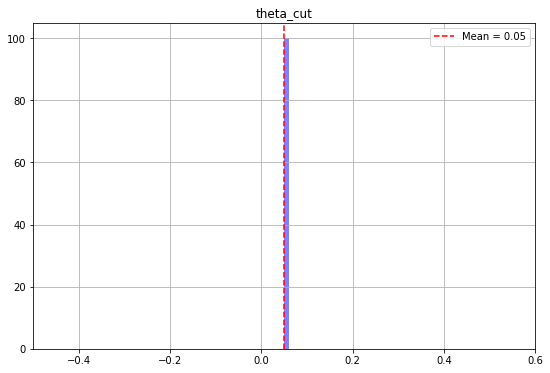

Bin center 15.49227220448671 TeV


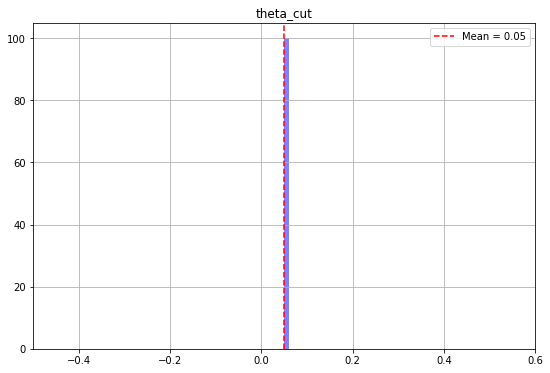

Bin center 16.222400499493478 TeV


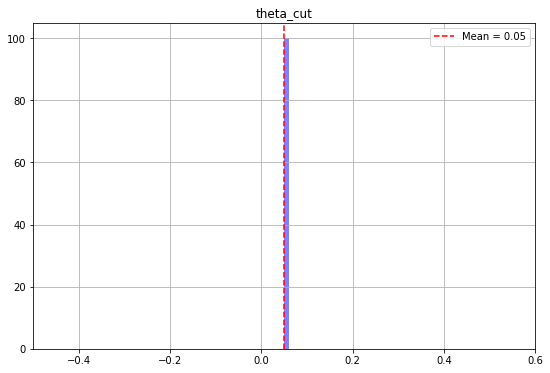

Bin center 16.98693868093479 TeV


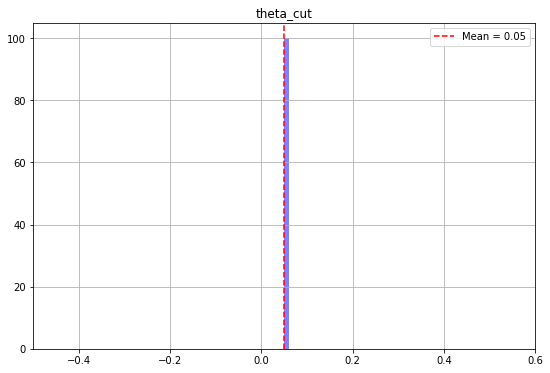

Bin center 17.787508436796912 TeV


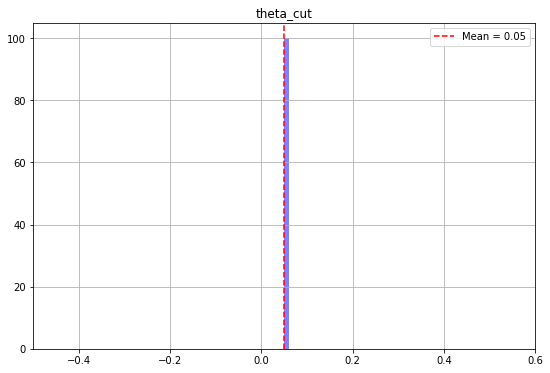

Bin center 18.625807882866276 TeV


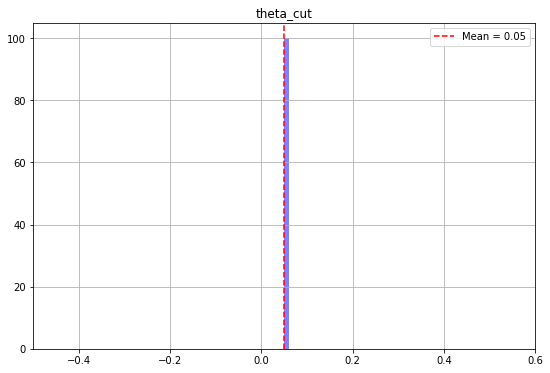

Bin center 19.503615164660765 TeV


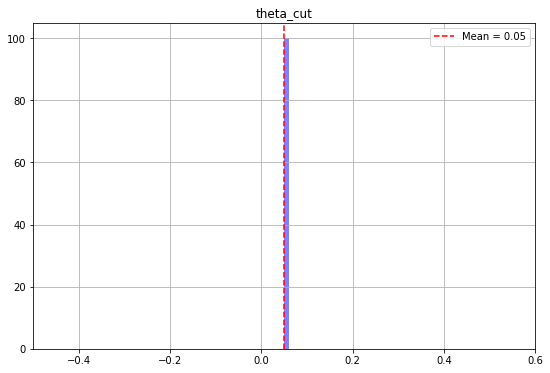

Bin center 20.422792229114734 TeV


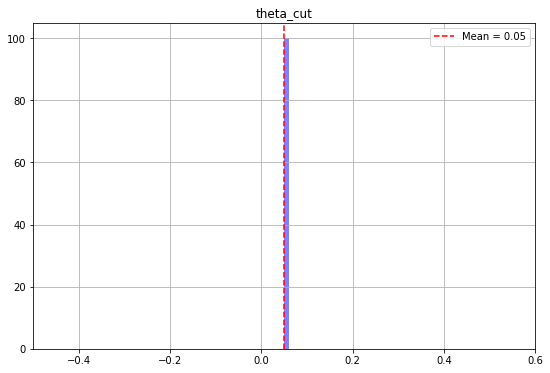

Bin center 21.385288774018107 TeV


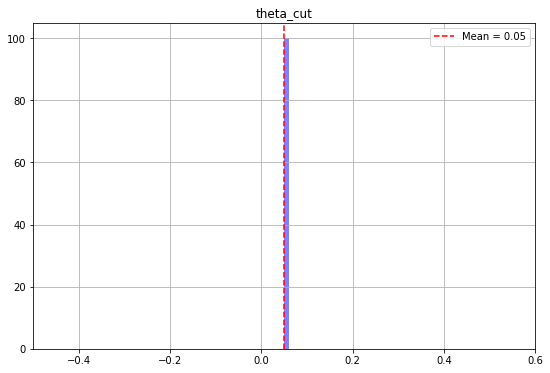

Bin center 22.39314638358678 TeV


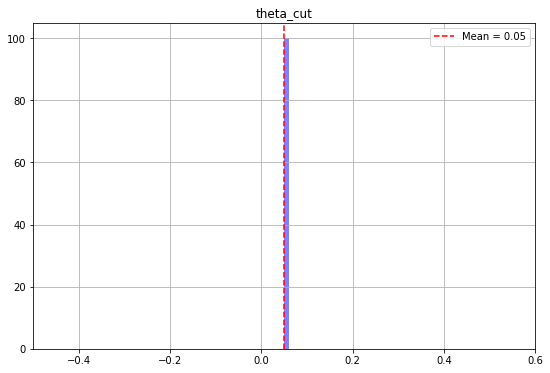

Bin center 23.44850285893648 TeV


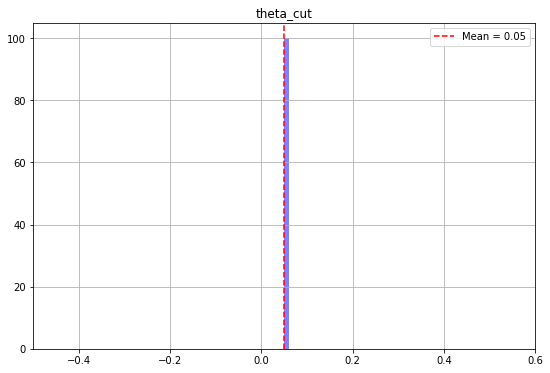

Bin center 24.553596752645525 TeV


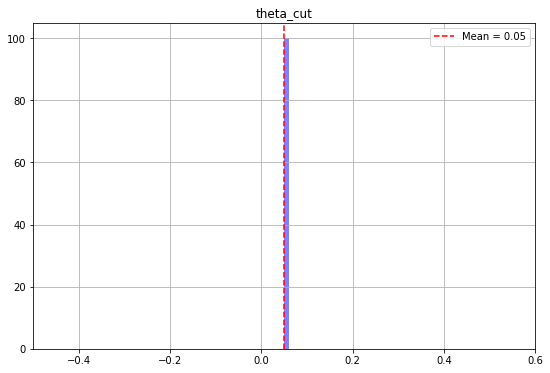

Bin center 25.710772117024987 TeV


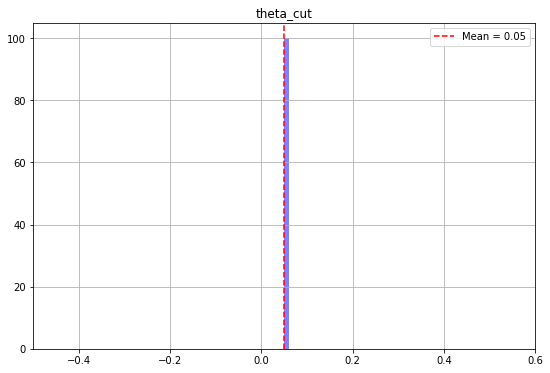

Bin center 26.92248347616793 TeV


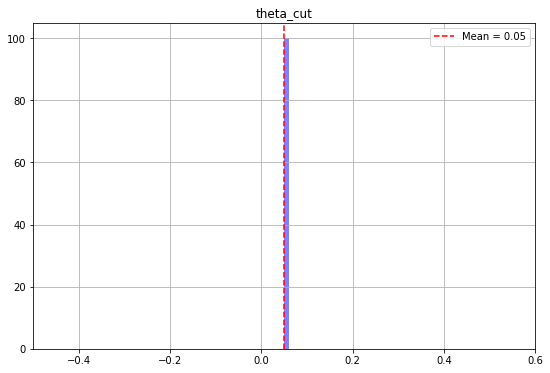

Bin center 28.191301032324063 TeV


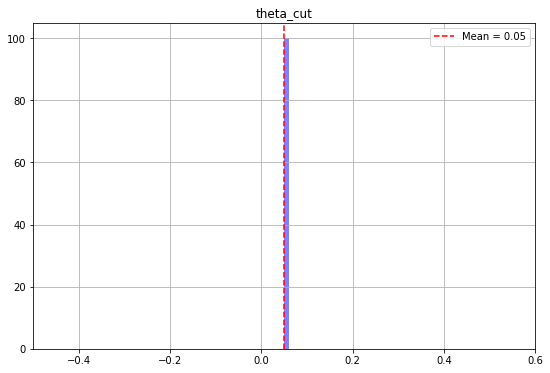

Bin center 29.51991611764332 TeV


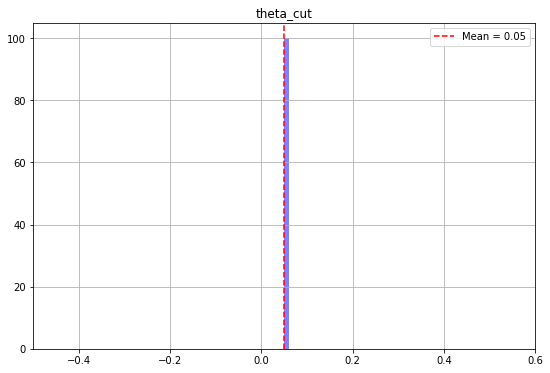

Bin center 30.9111469028522 TeV


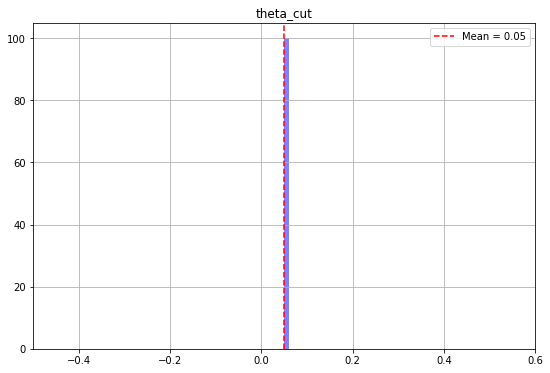

Bin center 32.367944374971685 TeV


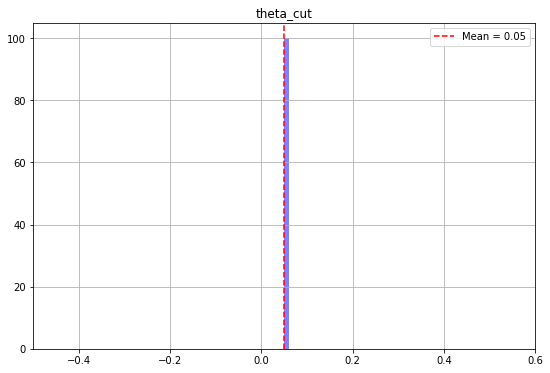

Bin center 33.893398596756384 TeV


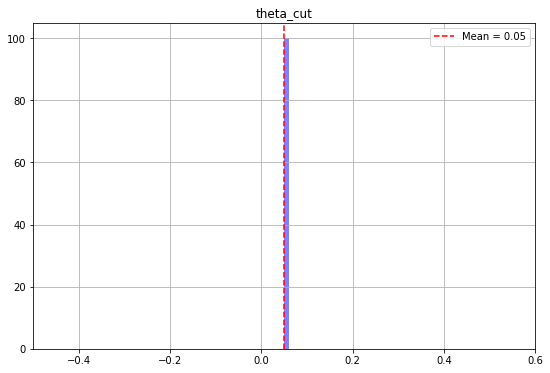

Bin center 35.490745261131906 TeV


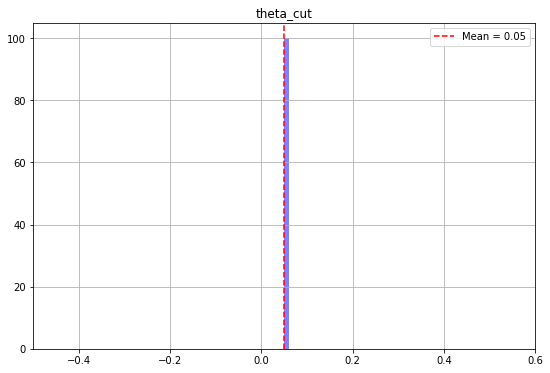

Bin center 37.163372554533396 TeV


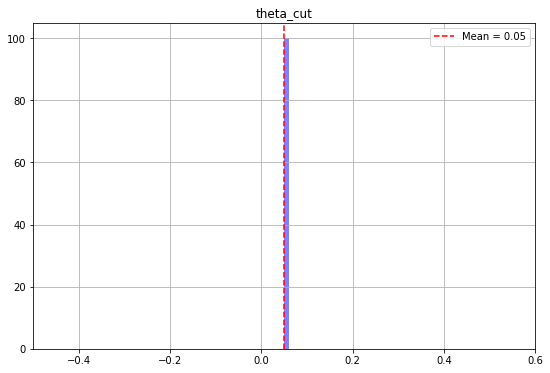

Bin center 38.914828343703206 TeV


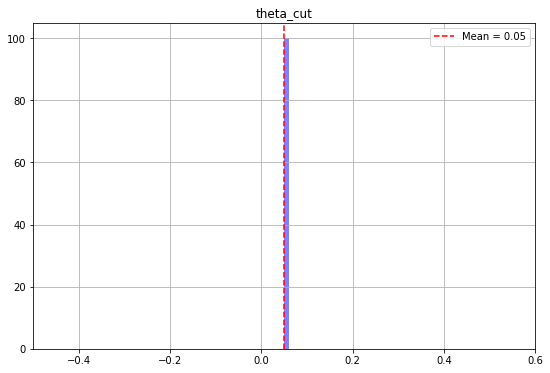

Bin center 40.748827701191935 TeV


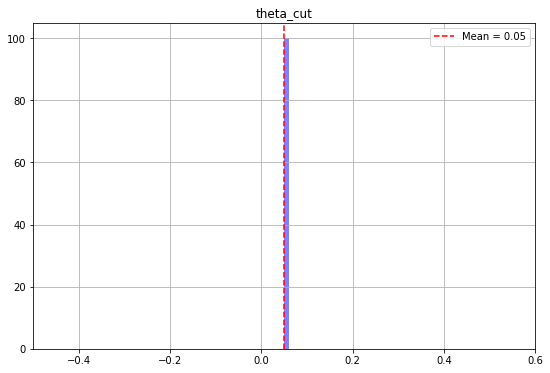

Bin center 42.66926078552539 TeV


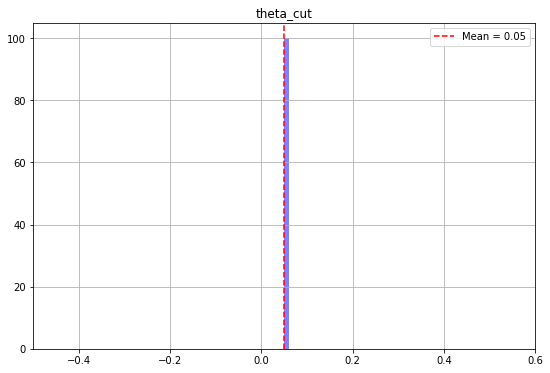

Bin center 44.680201092752384 TeV


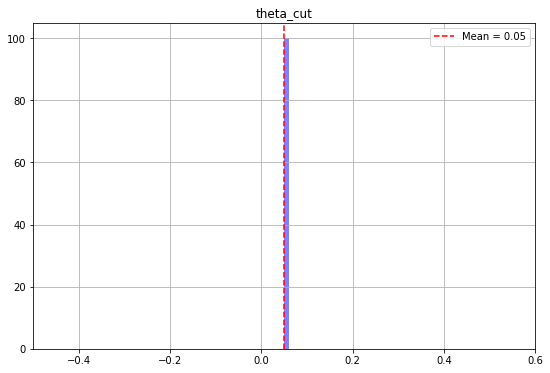

Bin center 46.78591409687602 TeV


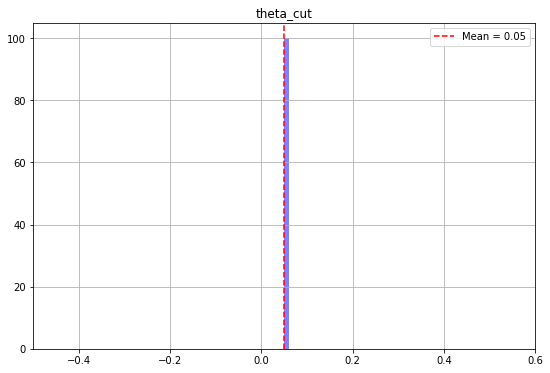

Bin center 48.9908662974959 TeV


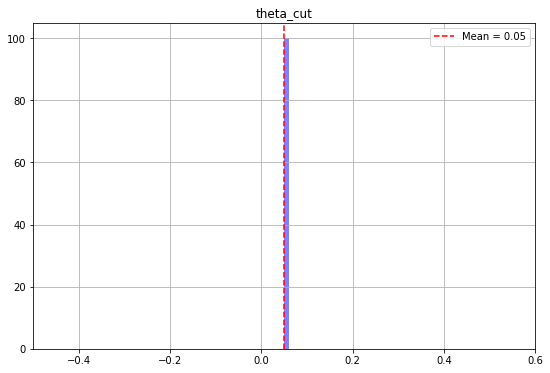

Bin center 51.299734693852635 TeV


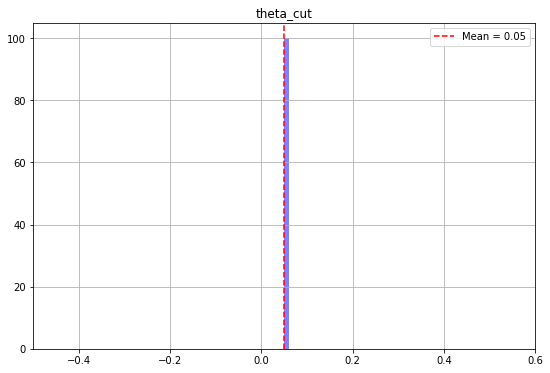

Bin center 53.71741670537027 TeV


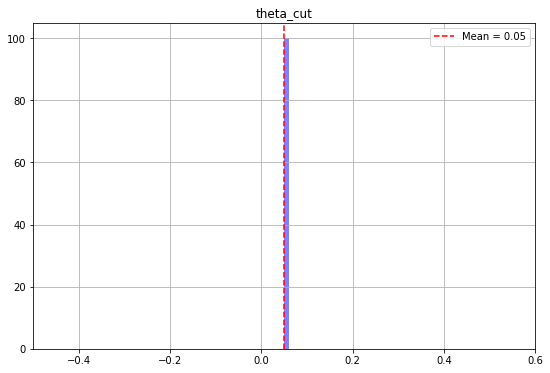

Bin center 56.249040559739505 TeV


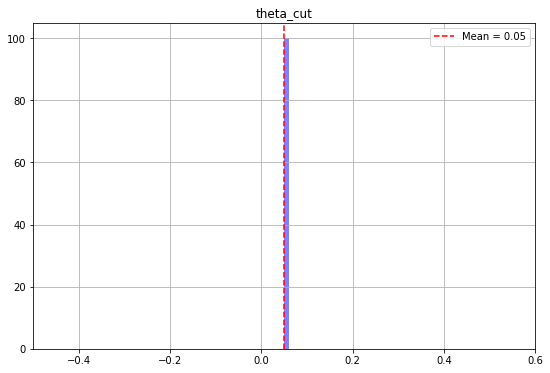

Bin center 58.89997617057619 TeV


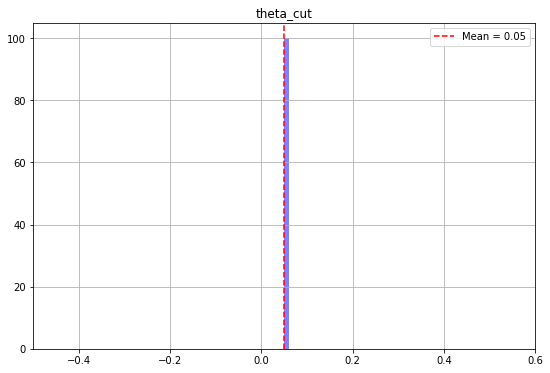

Bin center 61.67584652772803 TeV


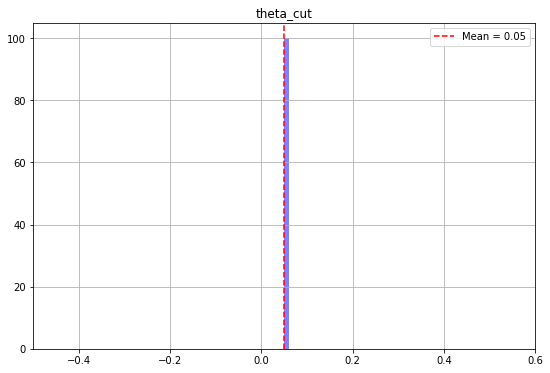

Bin center 64.58253962438997 TeV


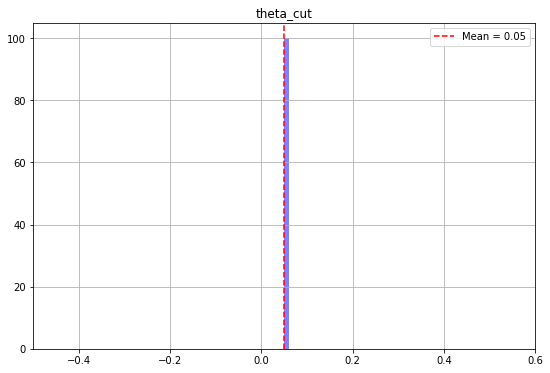

Bin center 67.62622094632715 TeV


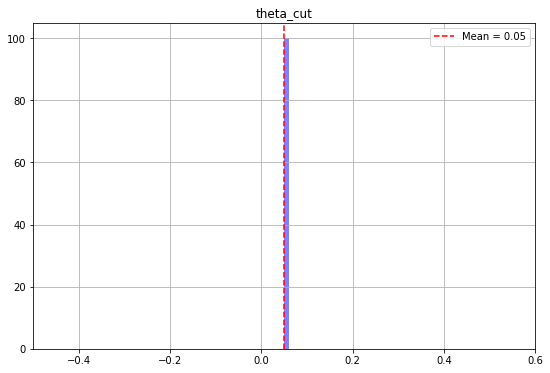

Bin center 70.81334654969689 TeV


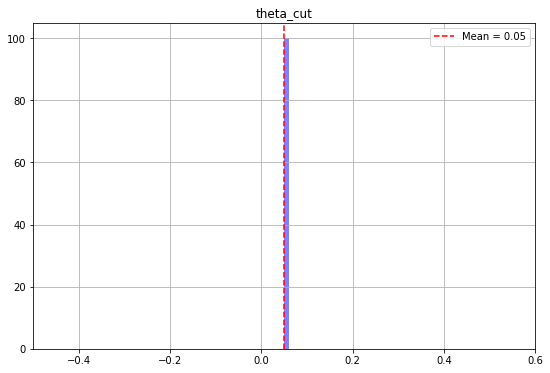

Bin center 74.15067675520928 TeV


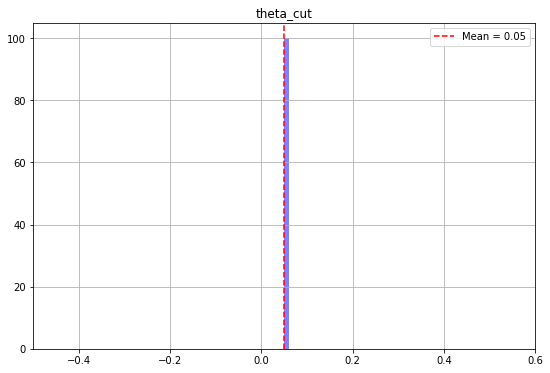

Bin center 77.64529048767389 TeV


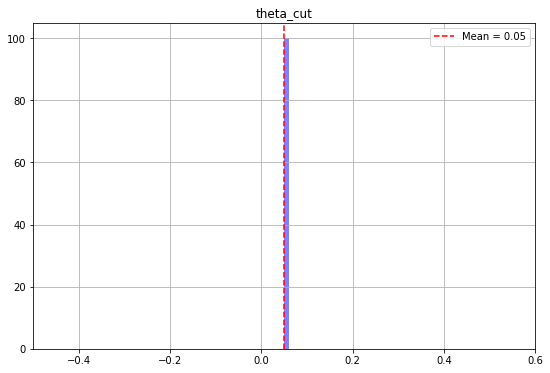

Bin center 81.30460029134827 TeV


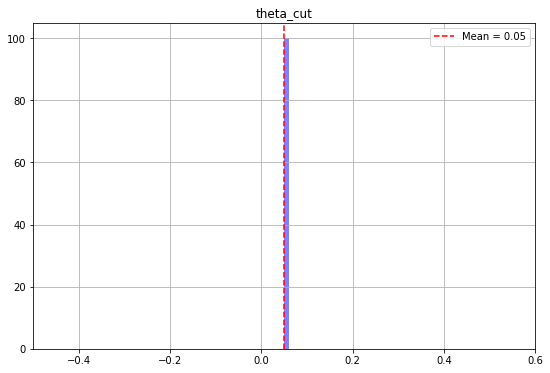

Bin center 85.13636805293827 TeV


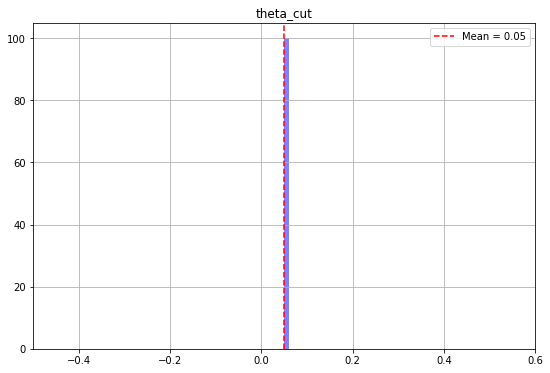

Bin center 89.14872146560023 TeV


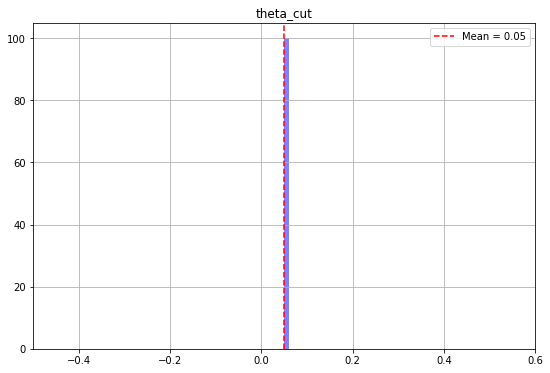

Bin center 93.35017126886804 TeV


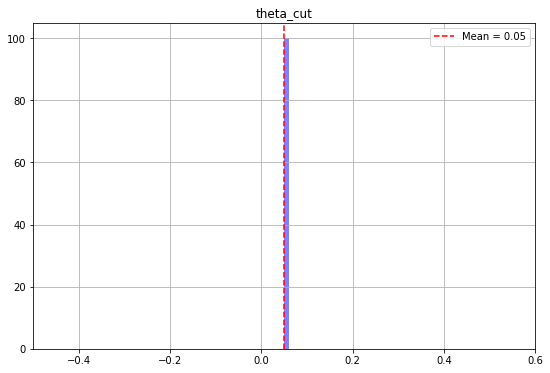

Bin center 97.74962930107259 TeV


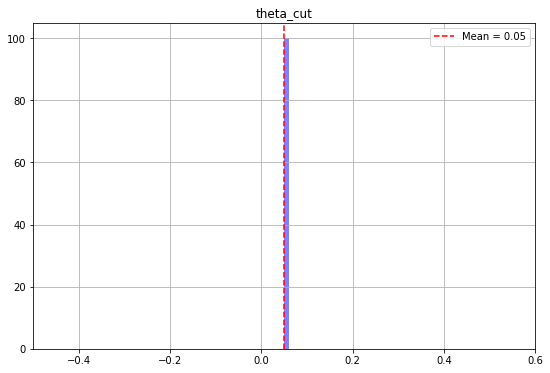

Bin center 102.35642740254582 TeV


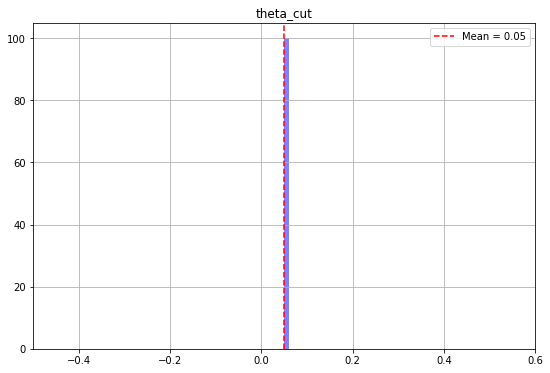

Bin center 107.1803372097051 TeV


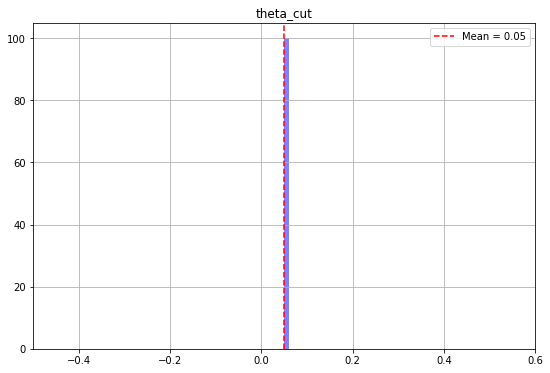

Bin center 112.23159088200431 TeV


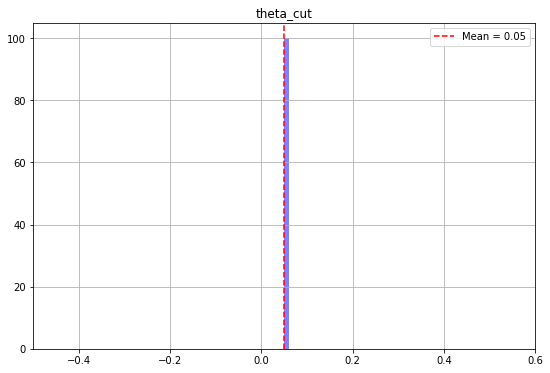

Bin center 117.52090280571576 TeV


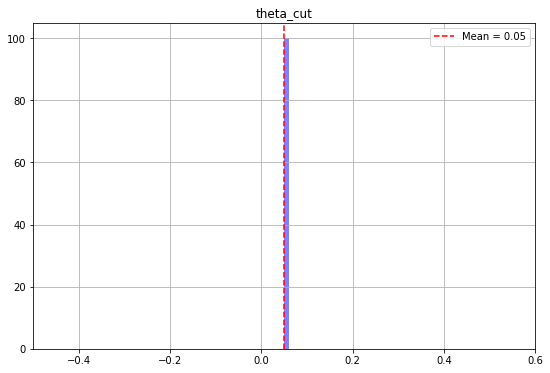

Bin center 123.05949232058003 TeV


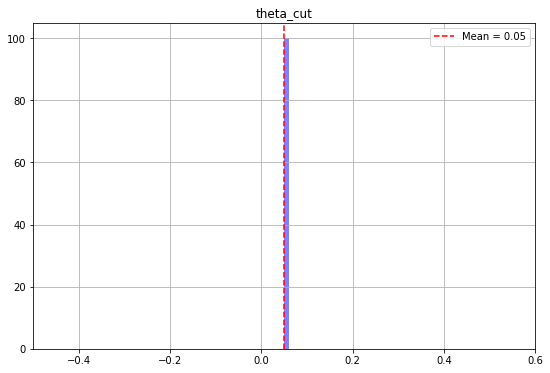

Bin center 128.85910751752974 TeV


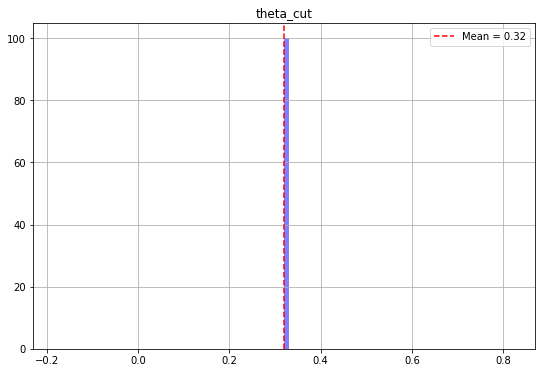

Bin center 134.93205015796568 TeV


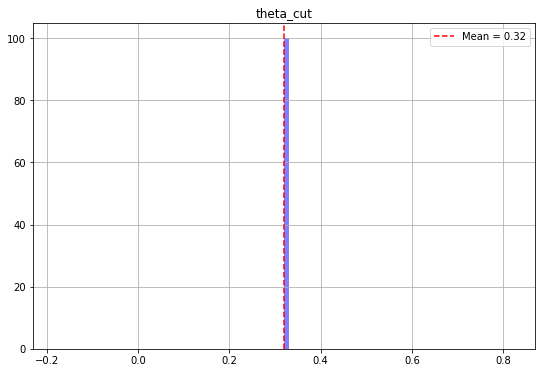

Bin center 141.2912017674419 TeV


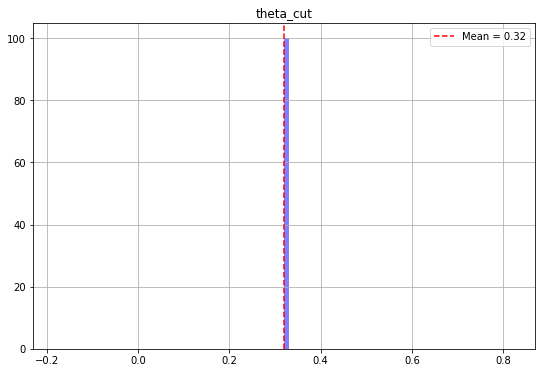

Bin center 147.95005095910813 TeV


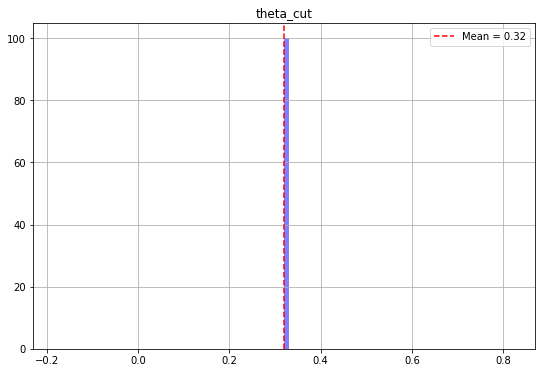

Bin center 154.92272204486733 TeV


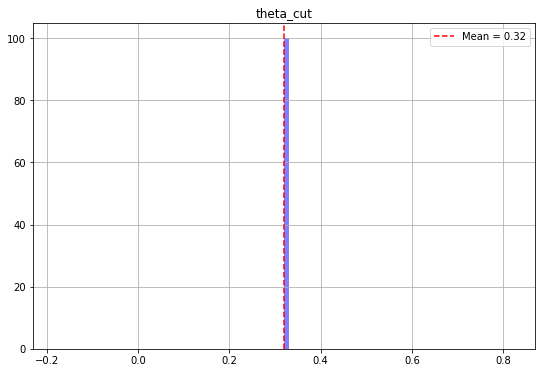

Bin center 162.22400499493503 TeV


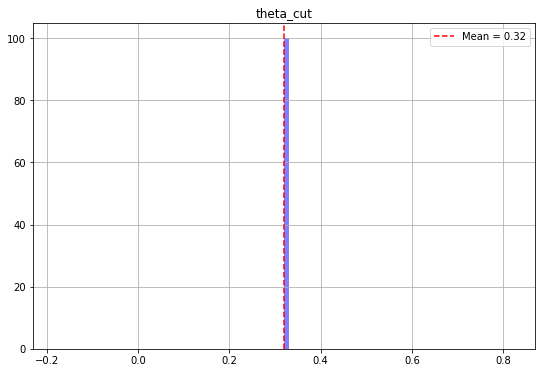

Bin center 169.86938680934838 TeV


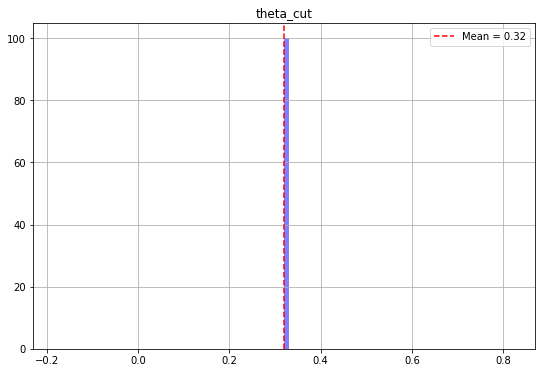

Bin center 177.87508436796958 TeV


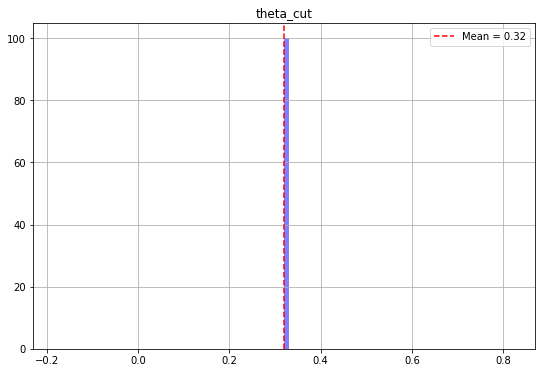

Bin center 186.25807882866306 TeV


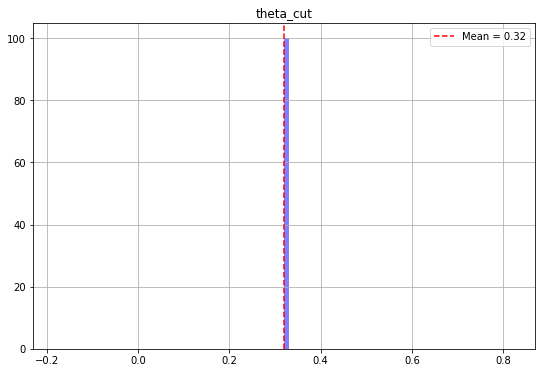

Bin center 195.03615164660795 TeV


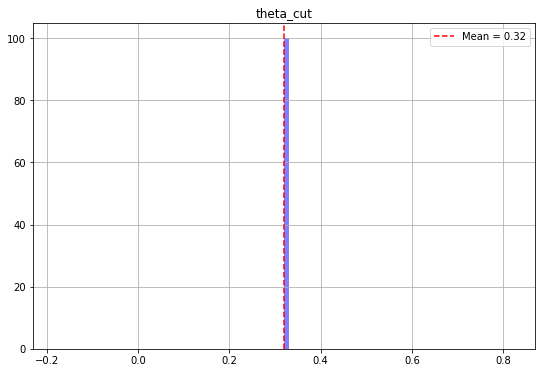

Bin center inf TeV


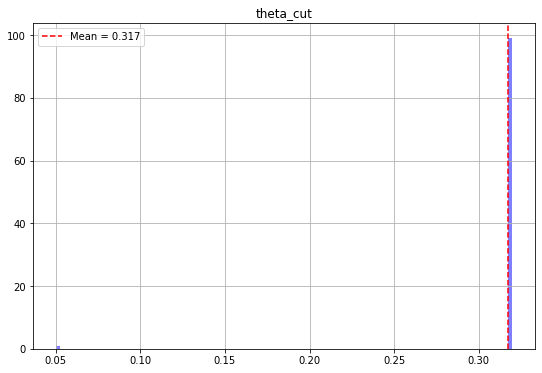

In [8]:
for e in  energy_centers:
    
    print(f'Bin center {e} TeV')
    
    plt.hist(theta_cut_boostrap[e], bins=100, alpha=0.5, color='b')
    plt.title('theta_cut')
    plt.axvline(np.nanmean(theta_cut_boostrap[e]),color='r', linestyle='--',label= 'Mean = {:.3g}'.format(float(np.nanmean(theta_cut_boostrap[e]))))
    plt.legend()
    plt.grid()
    plt.show()    

/cta/verna/anaconda3/envs/protopipe/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3370: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]


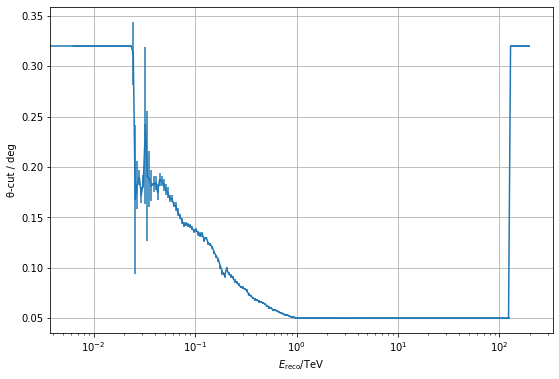

In [9]:
E = list(theta_cut_boostrap.keys())

theta_cut_boostrap_mean = [ np.nanmean(theta_cut_boostrap[e]) for e in E]
theta_cut_boostrap_std = [ np.nanstd(theta_cut_boostrap[e]) for e in E]

plt.errorbar(
    E,
    theta_cut_boostrap_mean,
    xerr = energy_width,
    yerr = theta_cut_boostrap_std,
)
plt.ylabel('θ-cut / deg')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')
plt.grid()

In [10]:
protopipe_file = protopipe_path + 'pyirf_protopipe.fits.gz'

gh_cut = QTable.read(protopipe_file, hdu='GH_CUTS')[1:-1]

energy_low = gh_cut['low'].to_value(u.TeV)
energy_high = gh_cut['high'].to_value(u.TeV)
energy_centers = 0.5 * (gh_cut['low'] + gh_cut['high']).to_value(u.TeV)
energy_width = 0.5 * (gh_cut['high'] - gh_cut['low']).to_value(u.TeV)

gh_cut_boostrap = {}
for e in  energy_centers:
    gh_cut_boostrap[e] = [] 

In [11]:
for i in Boostrap:
    protopipe_file = protopipe_path + f'pyirf_protopipe_{i}.fits.gz'
    
    # [1:-1] removes under/overflow bins
    gh_cut = QTable.read(protopipe_file, hdu='GH_CUTS')[1:-1]

    for n, e in  enumerate(energy_centers):
        gh_cut_boostrap[e].append(gh_cut['cut'][n])

Bin center 0.016270938633815235 TeV


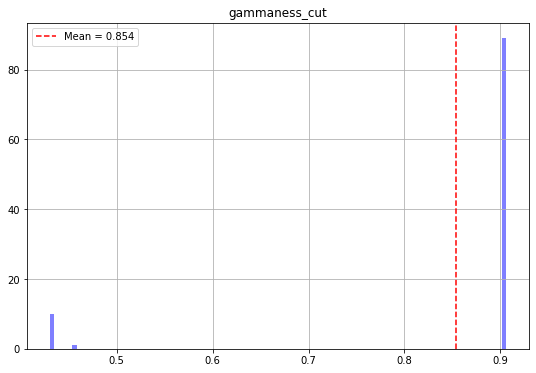

Bin center 0.025787699875686295 TeV


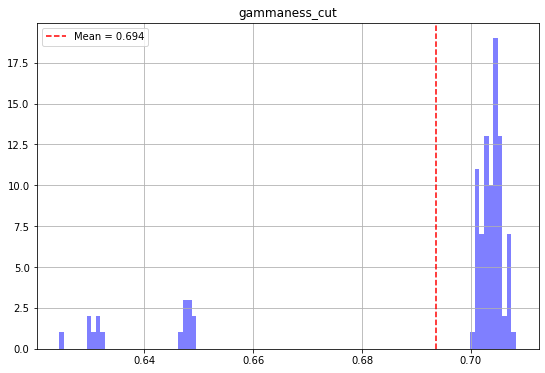

Bin center 0.04087074998220551 TeV


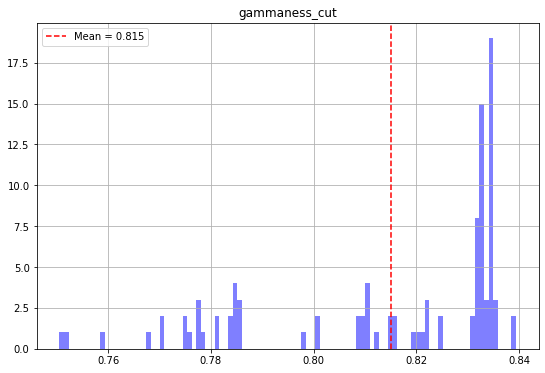

Bin center 0.06477577341757768 TeV


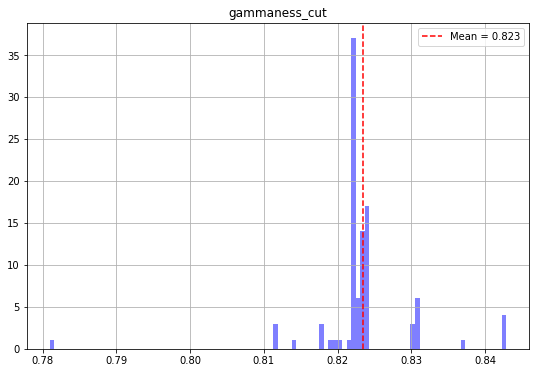

Bin center 0.1026626823259224 TeV


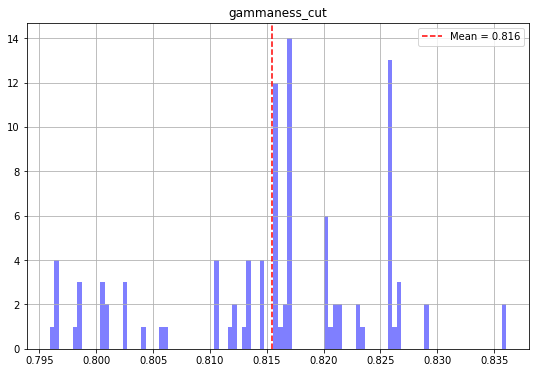

Bin center 0.1627093863381523 TeV


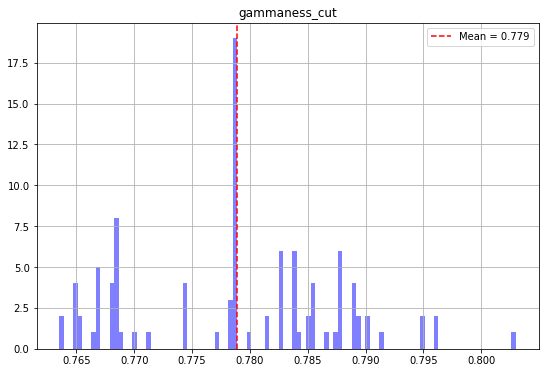

Bin center 0.2578769987568628 TeV


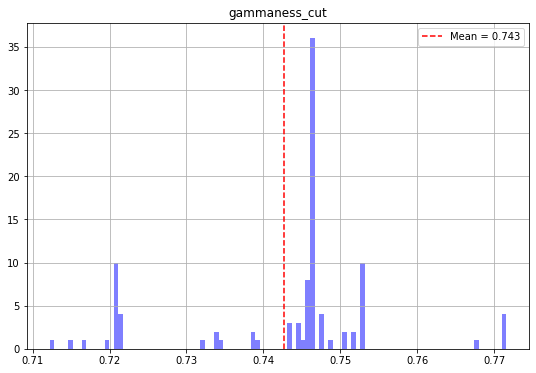

Bin center 0.4087074998220549 TeV


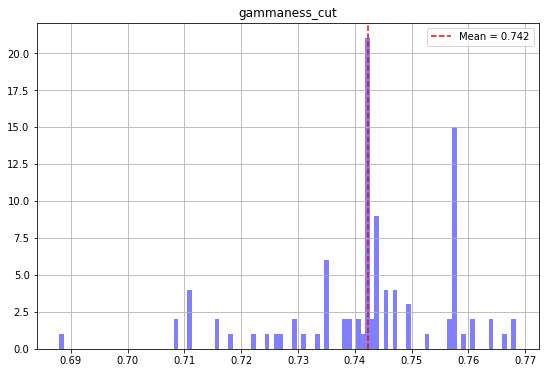

Bin center 0.6477577341757765 TeV


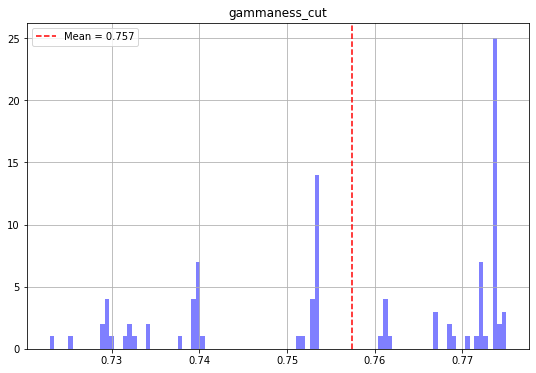

Bin center 1.0266268232592235 TeV


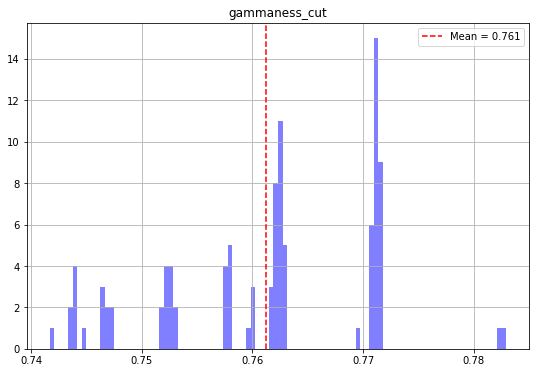

Bin center 1.6270938633815215 TeV


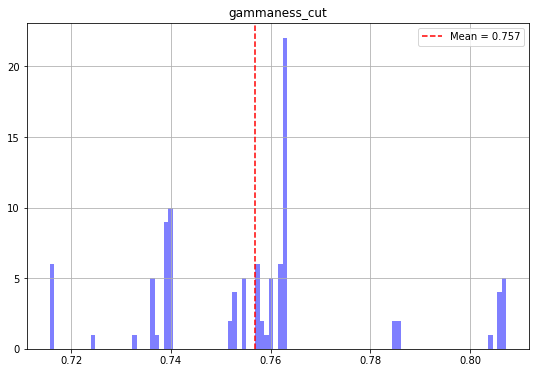

Bin center 2.5787699875686263 TeV


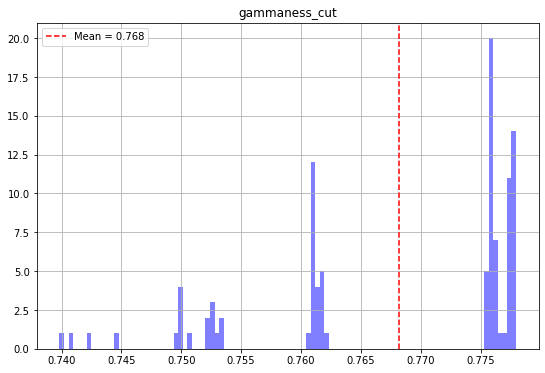

Bin center 4.087074998220548 TeV


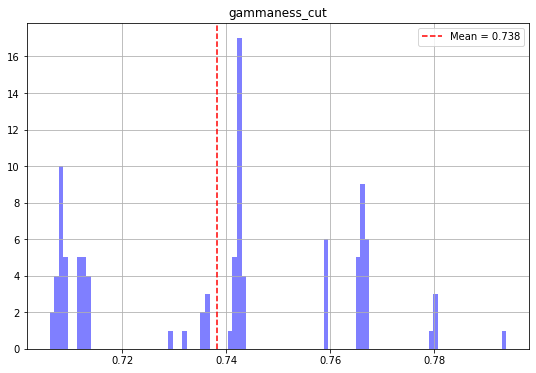

Bin center 6.477577341757763 TeV


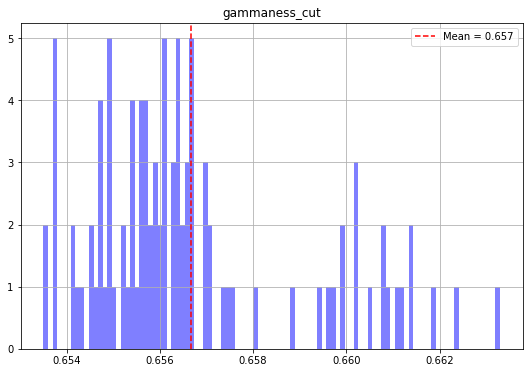

Bin center 10.266268232592228 TeV


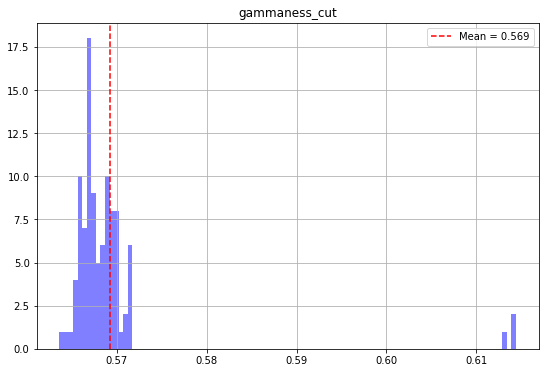

Bin center 16.27093863381521 TeV


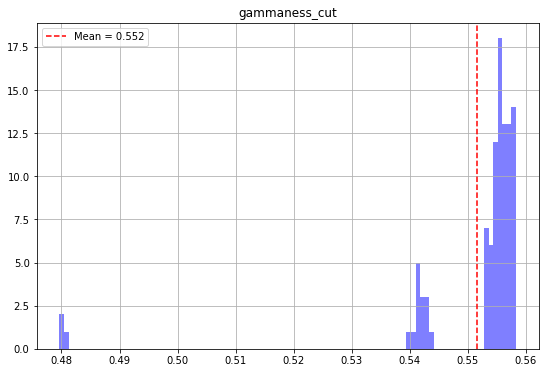

Bin center 25.787699875686265 TeV


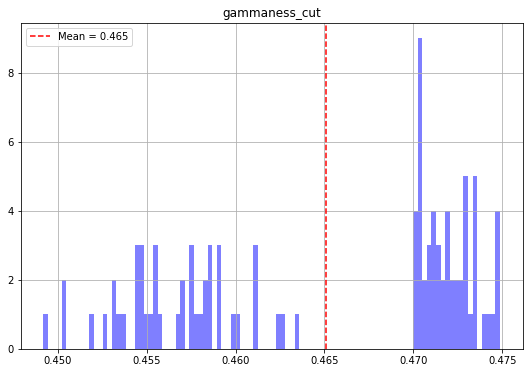

Bin center 40.87074998220545 TeV


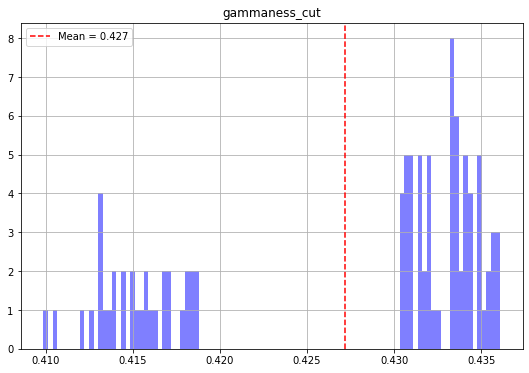

Bin center 64.77577341757755 TeV


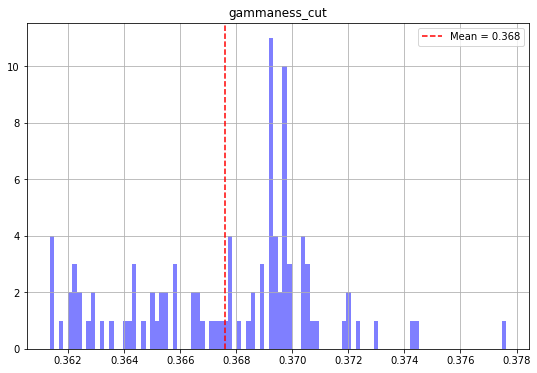

Bin center 102.66268232592222 TeV


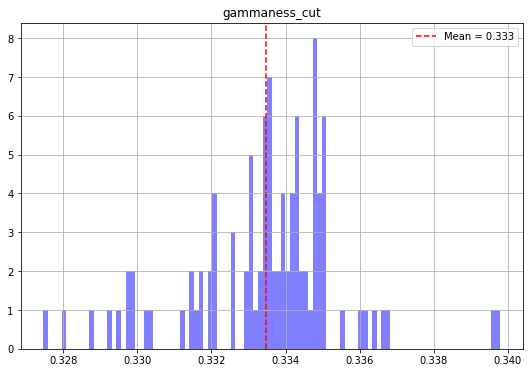

Bin center 162.7093863381521 TeV


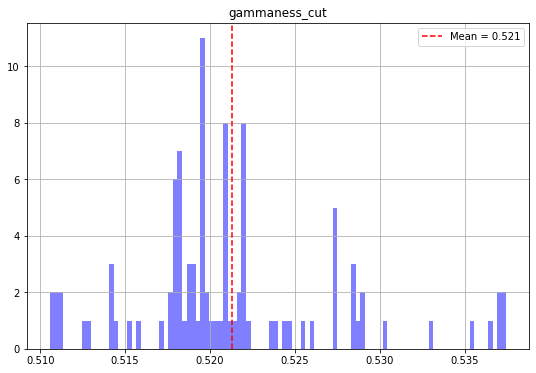

In [12]:
for e in  energy_centers:
    
    print(f'Bin center {e} TeV')
    
    plt.hist(gh_cut_boostrap[e], bins=100, alpha=0.5, color='b')
    plt.title('gammaness_cut')
    plt.axvline(np.nanmean(gh_cut_boostrap[e]),color='r', linestyle='--',label= 'Mean = {:.3g}'.format(float(np.nanmean(gh_cut_boostrap[e]))))
    plt.legend()
    plt.grid()
    plt.show()    

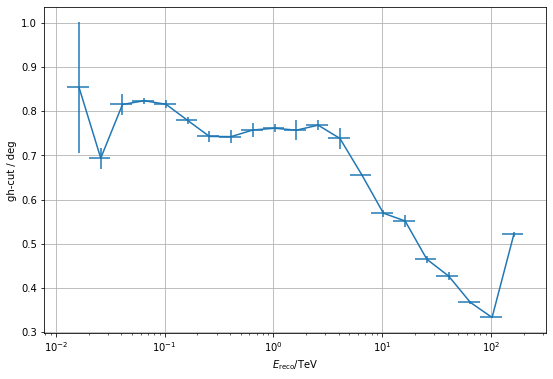

In [13]:
E = list(gh_cut_boostrap.keys())

gh_cut_boostrap_mean = [ np.nanmean(gh_cut_boostrap[e]) for e in E]
gh_cut_boostrap_std = [ np.nanstd(gh_cut_boostrap[e]) for e in E]

plt.errorbar(
    E,
    gh_cut_boostrap_mean,
    xerr = energy_width,
    yerr = gh_cut_boostrap_std,
)
plt.ylabel('gh-cut / deg')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')
plt.grid()

## Differential sensitivity from cuts optimization

In [14]:
# [1:-1] removes under/overflow bins
sensitivity_protopipe = QTable.read(protopipe_file, hdu='SENSITIVITY')[1:-1]
energy_width = (sensitivity_protopipe['reco_energy_high'] - sensitivity_protopipe['reco_energy_low'])

#n_signal_boostrap = {}
#n_signal_w_boostrap = {}
#n_bkg_boostrap = {}
#n_bkg_w_boostrap = {}
flux_sensitivity_boostrap = {}

for e in energy_centers:
    flux_sensitivity_boostrap[e] = []

In [15]:
for i in Boostrap:
    
    protopipe_file = protopipe_path + f'pyirf_protopipe_{i}.fits.gz'
    
    # [1:-1] removes under/overflow bins
    sensitivity = QTable.read(protopipe_file, hdu='SENSITIVITY')[1:-1]

    for n, e in  enumerate(energy_centers):
        flux_sensitivity_boostrap[e].append(sensitivity['flux_sensitivity'][n].value)

Bin center 0.025787699875686295 TeV


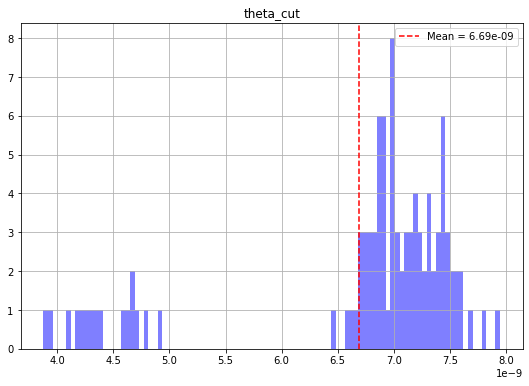

Bin center 0.04087074998220551 TeV


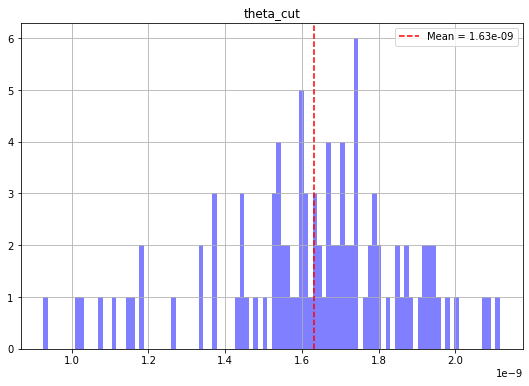

Bin center 0.06477577341757768 TeV


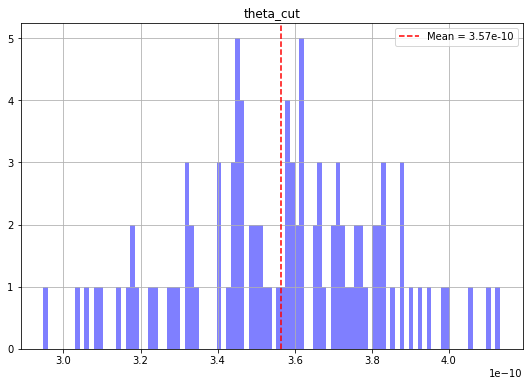

Bin center 0.1026626823259224 TeV


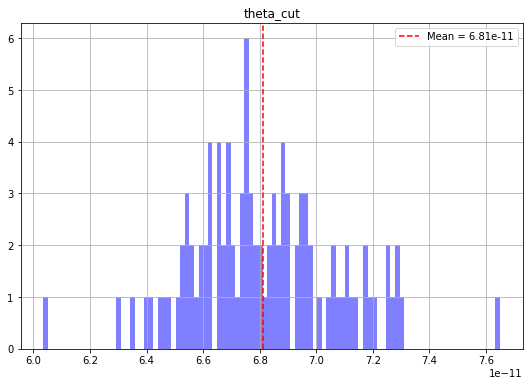

Bin center 0.1627093863381523 TeV


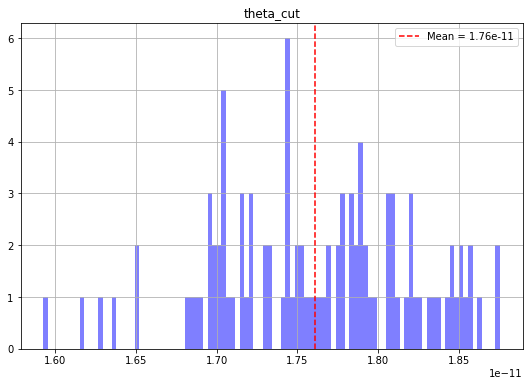

Bin center 0.2578769987568628 TeV


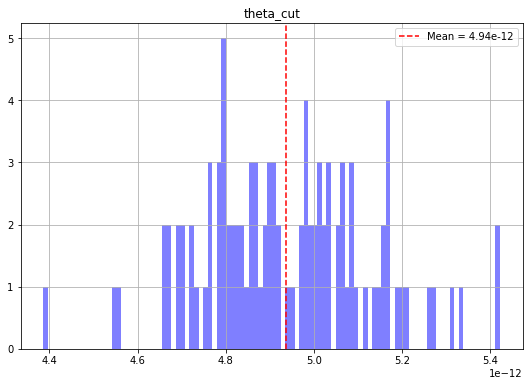

Bin center 0.4087074998220549 TeV


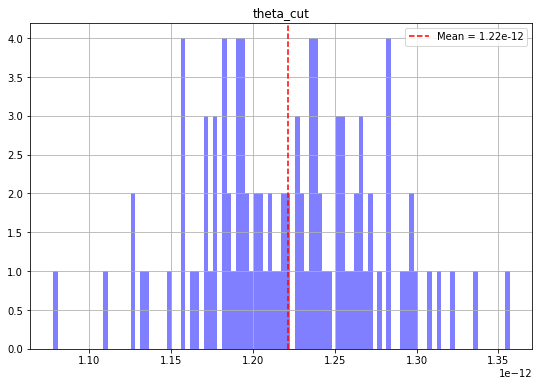

Bin center 0.6477577341757765 TeV


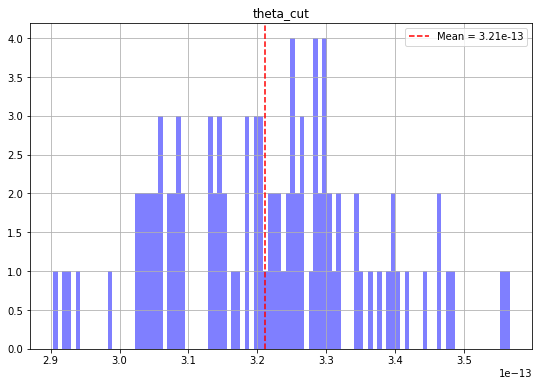

Bin center 1.0266268232592235 TeV


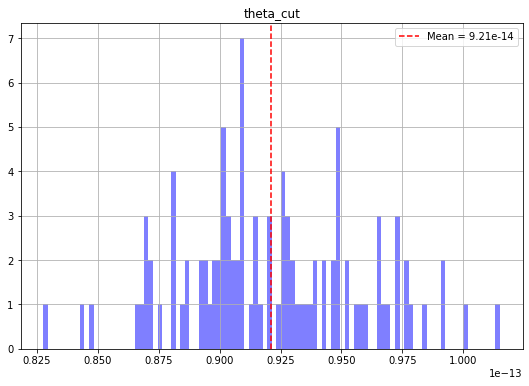

Bin center 1.6270938633815215 TeV


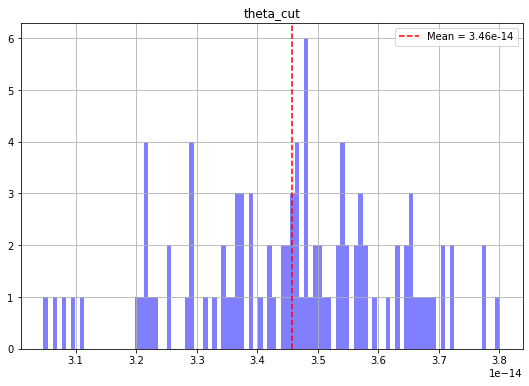

Bin center 2.5787699875686263 TeV


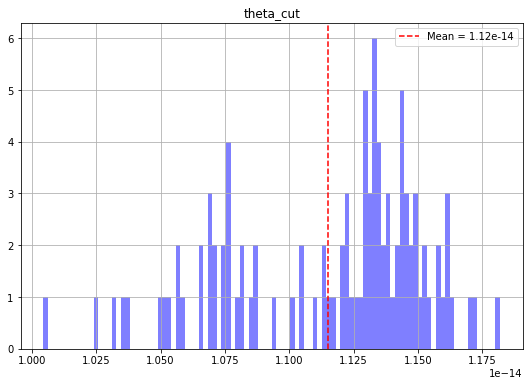

Bin center 4.087074998220548 TeV


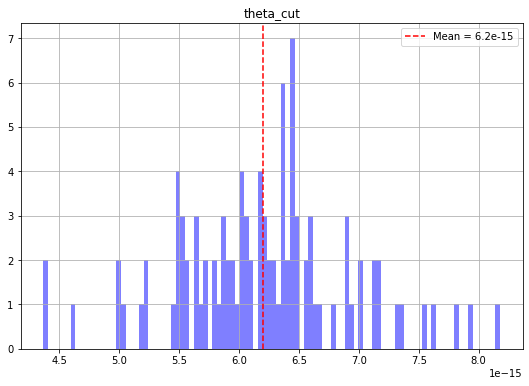

Bin center 6.477577341757763 TeV


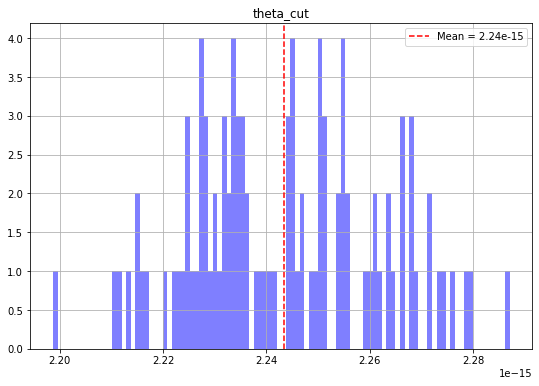

Bin center 10.266268232592228 TeV


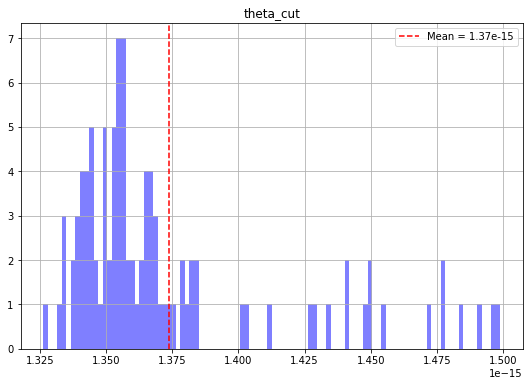

Bin center 16.27093863381521 TeV


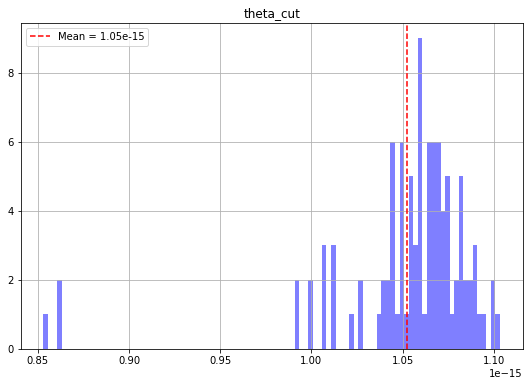

Bin center 25.787699875686265 TeV


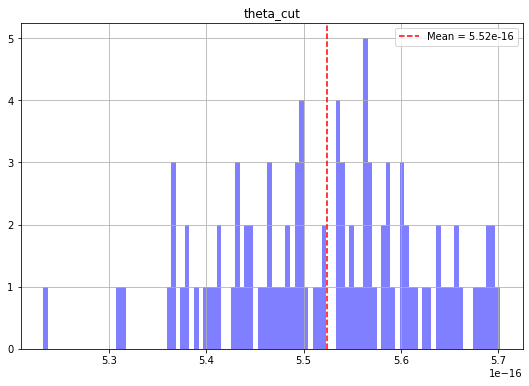

Bin center 40.87074998220545 TeV


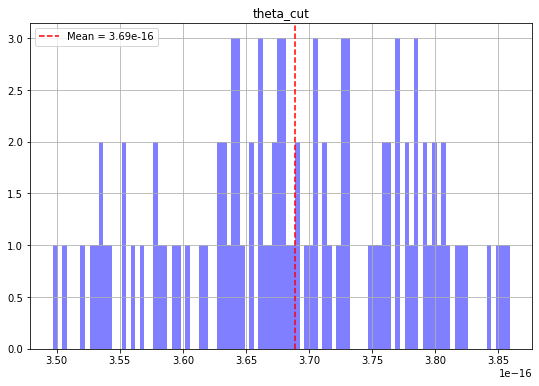

Bin center 64.77577341757755 TeV


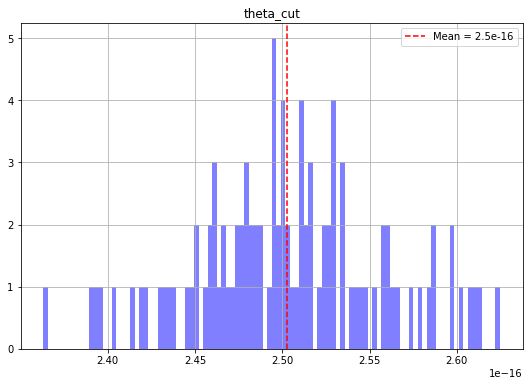

In [16]:
for e in  energy_centers[1:-2]:
    
    print(f'Bin center {e} TeV')
    
    plt.hist(flux_sensitivity_boostrap[e], bins=100, alpha=0.5, color='b')
    plt.title('theta_cut')
    plt.axvline(np.nanmean(flux_sensitivity_boostrap[e]),color='r', linestyle='--',label= 'Mean = {:.3g}'.format(float(np.nanmean(flux_sensitivity_boostrap[e]))))
    plt.legend()
    plt.grid()
    plt.show()    

/cta/verna/anaconda3/envs/protopipe/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: only dimensionless scalar quantities can be converted to Python scalars

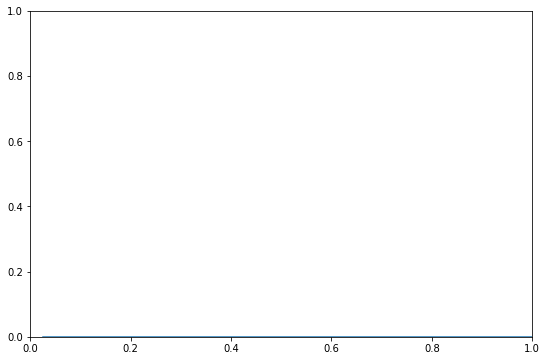

In [39]:
E = sensitivity_protopipe['reco_energy_center']

flux_sensitivity_mean = [ np.nanmean(flux_sensitivity_boostrap[e]) for e in E.value]
flux_sensitivity_std = [ np.nanstd(flux_sensitivity_boostrap[e]) for e in E.value]

unit = u.Unit('erg cm-2 s-1')

s = (E**2 * (flux_sensitivity_mean * u.Unit('cm-2 s-1 TeV-1')))
s_err = (E**2 * (flux_sensitivity_std * u.Unit('cm-2 s-1 TeV-1')))
#plt.plot(E, s.to_value(unit)*unit)

plt.errorbar(E,
             s.to_value(unit),
             xerr = energy_width / 2,
             yerr = s_err.to_value(unit)*unit
            )

plt.ylabel('flux_sensitivity')
plt.xlabel(r'$E_\mathrm{reco} / \mathrm{TeV}$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

## Protopipe Sensitivity

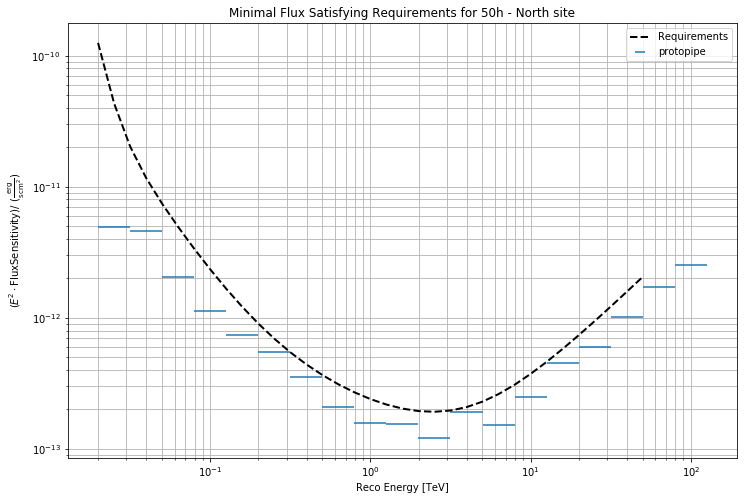

In [38]:
plt.figure(figsize=(12,8))

unit = u.Unit('erg cm-2 s-1')

# protopipe
e = sensitivity_protopipe['reco_energy_center']
w = (sensitivity_protopipe['reco_energy_high'] - sensitivity_protopipe['reco_energy_low'])
s = (e**2 * sensitivity_protopipe['flux_sensitivity'])

plt.errorbar(
    e.to_value(u.TeV),
    s.to_value(unit),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label='protopipe'
)

# Add requirements
plt.plot(requirements['sens']['ENERGY'], 
         requirements['sens']['SENSITIVITY'], 
         color='black', 
         ls='--', 
         lw=2, 
         label='Requirements'
)

# Style settings
plt.title(f'Minimal Flux Satisfying Requirements for {obs_time} - {site} site')
plt.xscale("log")
plt.yscale("log")
plt.ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")
plt.xlabel("Reco Energy [TeV]")

plt.grid(which="both")
plt.legend()


None # to remove clutter by mpl objects


## Sensitivity comparison

NameError: name 'sensitivity_ED_pyirf' is not defined

<Figure size 864x576 with 0 Axes>

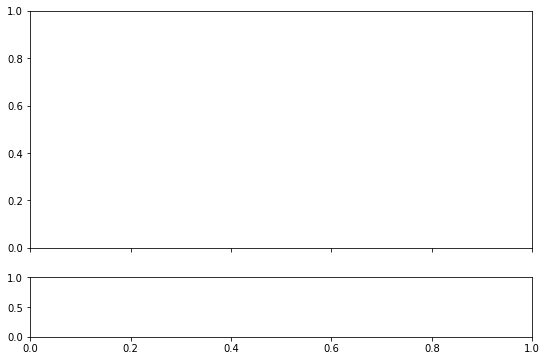

In [40]:
plt.figure(figsize=(12,8))
fig, (ax_sens, ax_ratio) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [4, 1]},
    sharex=True,
)
unit = u.Unit('erg cm-2 s-1')

# ED (pyirf)
e = sensitivity_ED_pyirf['reco_energy_center']
w = (sensitivity_ED_pyirf['reco_energy_high'] - sensitivity_ED_pyirf['reco_energy_low'])
s_ED = (e**2 * sensitivity_ED_pyirf['flux_sensitivity'])
ax_sens.errorbar(
    e.to_value(u.TeV),
    s_ED.to_value(unit),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label='EventDisplay (pyirf)'
)

# protopipe
e = sensitivity_protopipe['reco_energy_center']
w = (sensitivity_protopipe['reco_energy_high'] - sensitivity_protopipe['reco_energy_low'])
s_p = (e**2 * sensitivity_protopipe['flux_sensitivity'])
ax_sens.errorbar(
    e.to_value(u.TeV),
    s_p.to_value(unit),
    xerr=w.to_value(u.TeV) / 2,
    ls='',
    label='protopipe'
)

# ED
(y, yerr), edges = irf_eventdisplay["DiffSens"].to_numpy(errors=True)
bins = 10**edges
x = bin_center(bins)
width = np.diff(bins)
ax_sens.errorbar(
    x,
    y, 
    xerr=width/2,
    yerr=yerr,
    label="EventDisplay",
    ls=''
)

ax_ratio.errorbar(
    e.to_value(u.TeV), 
    s_ED.to_value(unit) / y,
    xerr=w.to_value(u.TeV)/2,
    ls=''
)
ax_ratio.errorbar(
    e.to_value(u.TeV), 
    s_p.to_value(unit) / y,
    xerr=w.to_value(u.TeV)/2,
    ls=''
)
ax_ratio.axhline(1, color = 'DarkGreen')
ax_ratio.set_yscale('log')
ax_ratio.set_xlabel("Reconstructed energy / TeV")
ax_ratio.set_ylabel('protopipe / eventdisplay')
ax_ratio.grid()
ax_ratio.yaxis.set_major_formatter(ScalarFormatter())

ax_ratio.set_ylim(0.5, 2.0)
ax_ratio.set_yticks([0.5, 2/3, 1, 3/2, 2])
ax_ratio.set_yticks([], minor=True)

# Style settings
ax_sens.set_title('Minimal Flux Satisfying Requirements for 50 hours')
ax_sens.set_xscale("log")
ax_sens.set_yscale("log")
ax_sens.set_ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

ax_sens.grid(which="both")
ax_sens.legend()
fig.tight_layout(h_pad=0)


None # to remove clutter by mpl objects

# IRFs

## Effective area

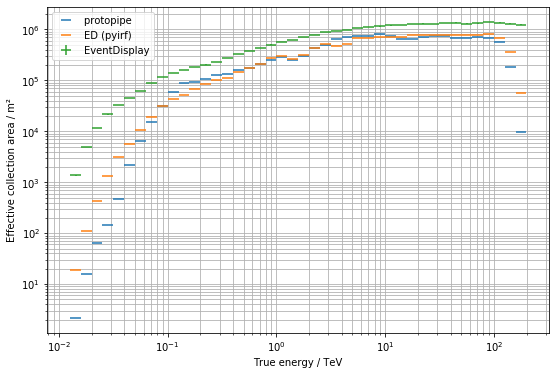

In [41]:
# protopipe
# uncomment the other strings to see effective areas
# for the different cut levels. Left out here for better
# visibility of the final effective areas.
suffixes = [
    ''
#     '_NO_CUTS',
#     '_ONLY_GH',
#     '_ONLY_THETA',
]

for suffix in suffixes: 
    area = QTable.read(protopipe_file, hdu='EFFECTIVE_AREA' + suffix)[0]
   
    plt.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1, 0],
        xerr=0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label='protopipe ' + suffix,
    )

# ED (pyirf)
for suffix in suffixes: 
    area = QTable.read(ED_pyirf_file, hdu='EFFECTIVE_AREA' + suffix)[0]
   
    plt.errorbar(
        0.5 * (area['ENERG_LO'] + area['ENERG_HI']).to_value(u.TeV)[1:-1],
        area['EFFAREA'].to_value(u.m**2).T[1:-1, 0],
        xerr=0.5 * (area['ENERG_LO'] - area['ENERG_HI']).to_value(u.TeV)[1:-1],
        ls='',
        label='ED (pyirf) ' + suffix,
    )
    
# ED
(y, yerr), edges = irf_eventdisplay["EffectiveAreaEtrue"].to_numpy(errors=True)

x = bin_center(10**edges)
xerr = 0.5 * np.diff(10**edges)

plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

# Style settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Effective collection area / m²")
plt.grid(which="both")
plt.legend()

None # to remove clutter by mpl objects

## Point Spread Function

In [42]:
psf_table = QTable.read(pyirf_file, hdu='PSF')[0]
# select the only fov offset bin
psf = psf_table['RPSF'].T[:, 0, :].to_value(1 / u.sr)

offset_bins = np.append(psf_table['RAD_LO'], psf_table['RAD_HI'][-1])
phi_bins = np.linspace(0, 2 * np.pi, 100)



# Let's make a nice 2d representation of the radially symmetric PSF
r, phi = np.meshgrid(offset_bins.to_value(u.deg), phi_bins)

# look at a single energy bin
# repeat values for each phi bin
center = 0.5 * (psf_table['ENERG_LO'] + psf_table['ENERG_HI'])


fig = plt.figure(figsize=(15, 5))
axs = [fig.add_subplot(1, 3, i, projection='polar') for i in range(1, 4)]


for bin_id, ax in zip([10, 20, 30], axs):
    image = np.tile(psf[bin_id], (len(phi_bins) - 1, 1))
    
    ax.set_title(f'PSF @ {center[bin_id]:.2f} TeV')
    ax.pcolormesh(phi, r, image)
    ax.set_ylim(0, 0.25)
    ax.set_aspect(1)
    
fig.tight_layout()

None # to remove clutter by mpl objects


NameError: name 'pyirf_file' is not defined

In [43]:
# Profile
center = 0.5 * (offset_bins[1:] + offset_bins[:-1])
xerr = 0.5 * (offset_bins[1:] - offset_bins[:-1])

for bin_id in [10, 20, 30]:
    plt.errorbar(
        center.to_value(u.deg),
        psf[bin_id],
        xerr=xerr.to_value(u.deg),
        ls='',
        label=f'Energy Bin {bin_id}'
    )
    
#plt.yscale('log')
plt.legend()
plt.xlim(0, 0.25)
plt.ylabel('PSF PDF / sr⁻¹')
plt.xlabel('Distance from True Source / deg')
plt.grid()

None # to remove clutter by mpl objects

NameError: name 'offset_bins' is not defined

### Angular resolution

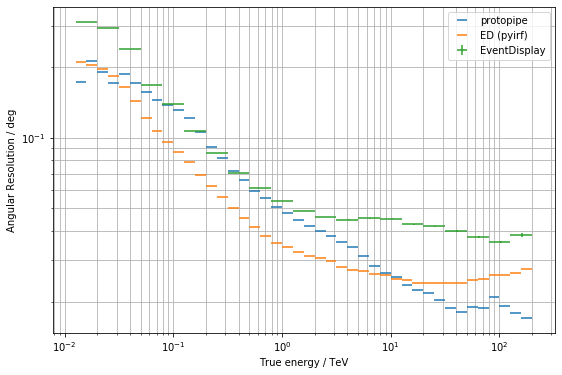

In [44]:
# protopipe
ang_res = QTable.read(protopipe_file, hdu='ANGULAR_RESOLUTION')[1:-1]

plt.errorbar(
    0.5 * (ang_res['true_energy_low'] + ang_res['true_energy_high']).to_value(u.TeV),
    ang_res['angular_resolution'].to_value(u.deg),
    xerr=0.5 * (ang_res['true_energy_high'] - ang_res['true_energy_low']).to_value(u.TeV),
    ls='',
    label='protopipe'
)

# ED (pyirf)
ang_res = QTable.read(ED_pyirf_file, hdu='ANGULAR_RESOLUTION')[1:-1]

plt.errorbar(
    0.5 * (ang_res['true_energy_low'] + ang_res['true_energy_high']).to_value(u.TeV),
    ang_res['angular_resolution'].to_value(u.deg),
    xerr=0.5 * (ang_res['true_energy_high'] - ang_res['true_energy_low']).to_value(u.TeV),
    ls='',
    label='ED (pyirf)'
)

# ED
(y, yerr), edges = irf_eventdisplay["AngRes"].to_numpy(errors=True)
x = bin_center(10**edges)
xerr = 0.5 * np.diff(10**edges)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

# Style settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV")
plt.ylabel("Angular Resolution / deg")
plt.grid(which="both")
plt.legend(loc="best")

None # to remove clutter by mpl objects

### Energy dispersion

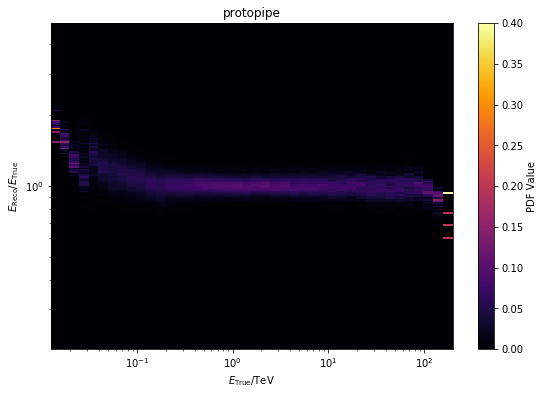

In [45]:
edisp = QTable.read(protopipe_file, hdu='ENERGY_DISPERSION')[0]

e_bins = edisp['ENERG_LO'][1:]
migra_bins = edisp['MIGRA_LO'][1:]

plt.title('protopipe')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, edisp['MATRIX'].T[1:-1, 1:-1, 0].T, cmap='inferno')

plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

None # to remove clutter by mpl objects

### Energy resolution

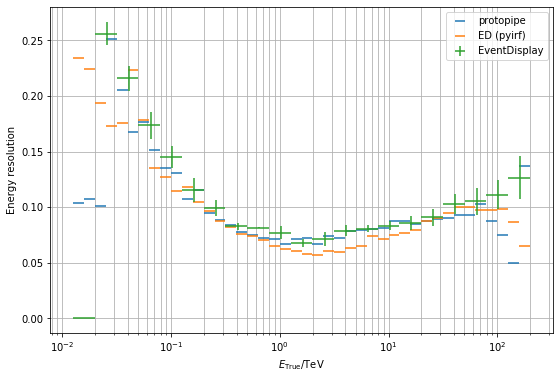

In [46]:
# protopipe
bias_resolution = QTable.read(protopipe_file, hdu='ENERGY_BIAS_RESOLUTION')[1:-1]
plt.errorbar(
    0.5 * (bias_resolution['true_energy_low'] + bias_resolution['true_energy_high']).to_value(u.TeV),
    bias_resolution['resolution'],
    xerr=0.5 * (bias_resolution['true_energy_high'] - bias_resolution['true_energy_low']).to_value(u.TeV),
    ls='',
    label='protopipe'
)
plt.xscale('log')

# ED (pyirf)
bias_resolution = QTable.read(ED_pyirf_file, hdu='ENERGY_BIAS_RESOLUTION')[1:-1]
plt.errorbar(
    0.5 * (bias_resolution['true_energy_low'] + bias_resolution['true_energy_high']).to_value(u.TeV),
    bias_resolution['resolution'],
    xerr=0.5 * (bias_resolution['true_energy_high'] - bias_resolution['true_energy_low']).to_value(u.TeV),
    ls='',
    label='ED (pyirf)'
)
plt.xscale('log')


# ED
(y, yerr), edges = irf_eventdisplay["ERes"].to_numpy(errors=True)
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

# Style settings
plt.xlabel(r"$E_\mathrm{True} / \mathrm{TeV}$")
plt.ylabel("Energy resolution")
plt.grid(which="both")
plt.legend(loc="best")

None # to remove clutter by mpl objects

## Background rate

/cta/verna/anaconda3/envs/protopipe/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


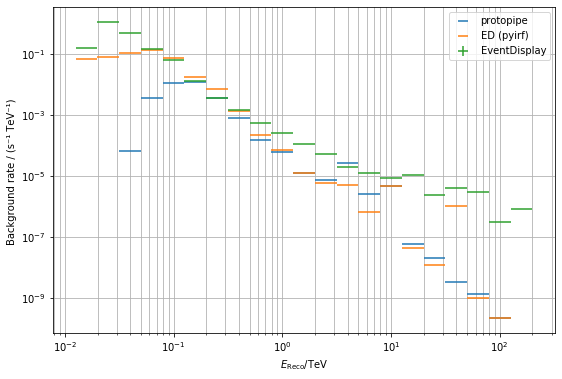

In [47]:
from pyirf.utils import cone_solid_angle

# protopipe
bg_rate = QTable.read(protopipe_file, hdu='BACKGROUND')[0]

reco_bins = np.append(bg_rate['ENERG_LO'], bg_rate['ENERG_HI'][-1])

# first fov bin, [0, 1] deg
fov_bin = 0
rate_bin = bg_rate['BKG'].T[:, fov_bin]

# interpolate theta cut for given e reco bin
e_center_bg = 0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI'])
e_center_theta = 0.5 * (rad_max['ENERG_LO'] + rad_max['ENERG_HI'])
theta_cut = np.interp(e_center_bg, e_center_theta, rad_max['RAD_MAX'].T[:, 0])

# undo normalization
rate_bin *= cone_solid_angle(theta_cut)
rate_bin *= np.diff(reco_bins)
plt.errorbar(
    0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI']).to_value(u.TeV)[1:-1],
    rate_bin.to_value(1 / u.s)[1:-1],
    xerr=np.diff(reco_bins).to_value(u.TeV)[1:-1] / 2,
    ls='',
    label='protopipe',
)

# ED (pyirf)
bg_rate = QTable.read(ED_pyirf_file, hdu='BACKGROUND')[0]

reco_bins = np.append(bg_rate['ENERG_LO'], bg_rate['ENERG_HI'][-1])

# first fov bin, [0, 1] deg
fov_bin = 0
rate_bin = bg_rate['BKG'].T[:, fov_bin]

# interpolate theta cut for given e reco bin
e_center_bg = 0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI'])
e_center_theta = 0.5 * (rad_max['ENERG_LO'] + rad_max['ENERG_HI'])
theta_cut = np.interp(e_center_bg, e_center_theta, rad_max['RAD_MAX'].T[:, 0])

# undo normalization
rate_bin *= cone_solid_angle(theta_cut)
rate_bin *= np.diff(reco_bins)
plt.errorbar(
    0.5 * (bg_rate['ENERG_LO'] + bg_rate['ENERG_HI']).to_value(u.TeV)[1:-1],
    rate_bin.to_value(1 / u.s)[1:-1],
    xerr=np.diff(reco_bins).to_value(u.TeV)[1:-1] / 2,
    ls='',
    label='ED (pyirf)',
)

# ED
(y, yerr), edges = irf_eventdisplay["BGRate"].to_numpy(errors=True)
x = bin_center(10**edges)
xerr = np.diff(10**edges) / 2
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls='', label="EventDisplay")

# Style settings
plt.xscale("log")
plt.xlabel(r"$E_\mathrm{Reco} / \mathrm{TeV}$")
plt.ylabel("Background rate / (s⁻¹ TeV⁻¹) ")
plt.grid(which="both")
plt.legend(loc="best")
plt.yscale('log')

None # to remove clutter by mpl objects